
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

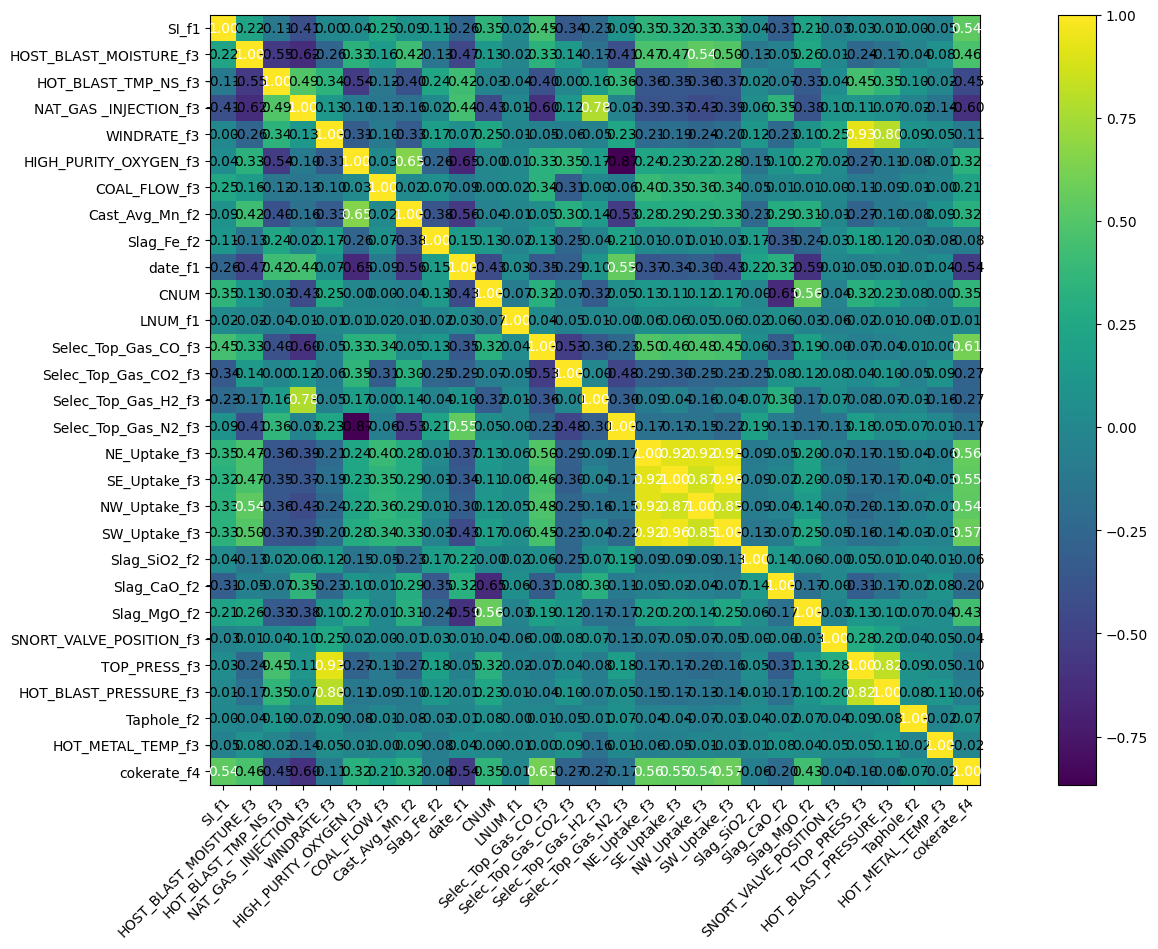

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

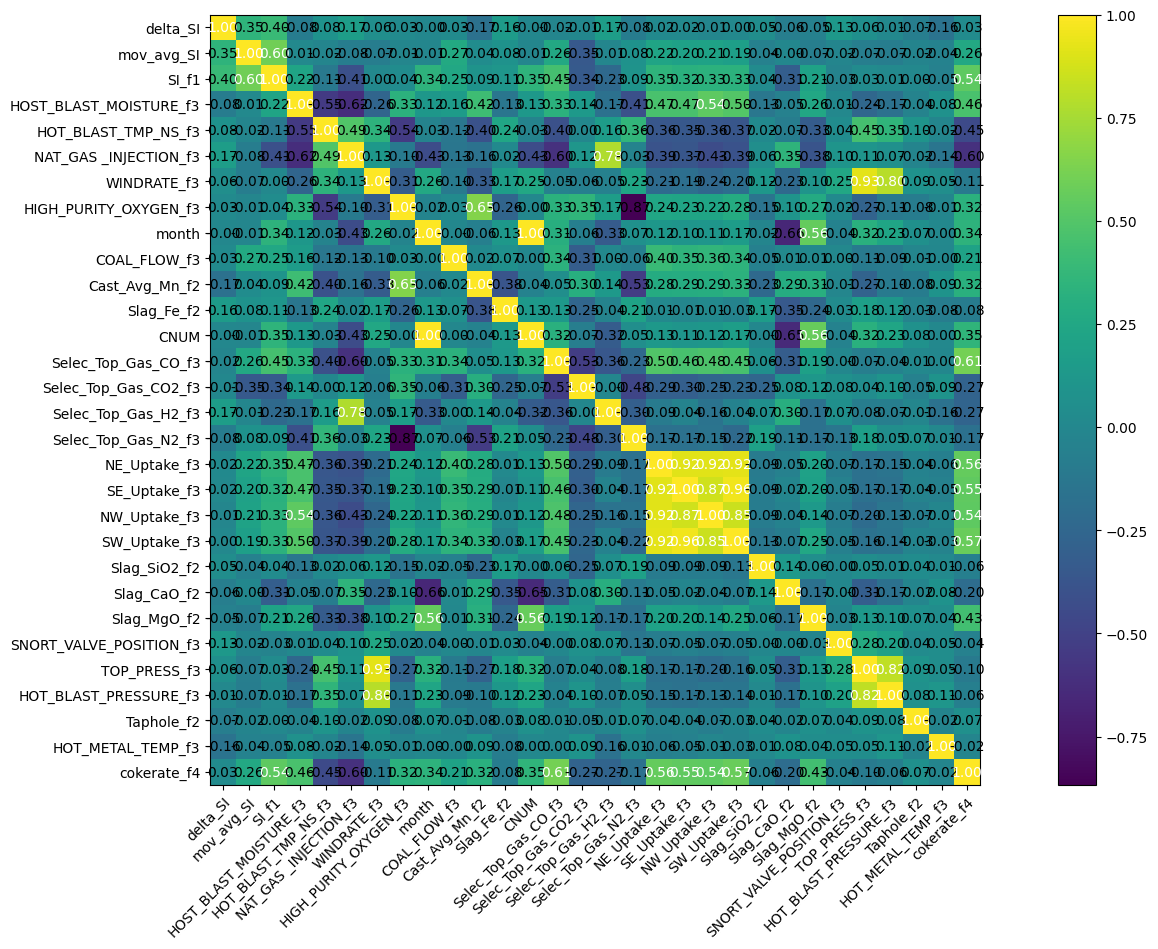

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.092799
Loss_SI: 1.0764826536178589 Loss_all: 1.239647388458252
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.110214
Loss_SI: 0.046720683574676514 Loss_all: 0.6816538572311401
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.052846
Loss_SI: 0.017147541046142578 Loss_all: 0.3741283118724823
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.041441
Loss_SI: 0.010657097212970257 Loss_all: 0.31850090622901917
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.037542
Loss_SI: 0.00995094794780016 Loss_all: 0.28585729002952576
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.035388
Loss_SI: 0.01097842212766409 Loss_all: 0.2550692856311798
Prediction shape: torch.Size([32, 35])
===


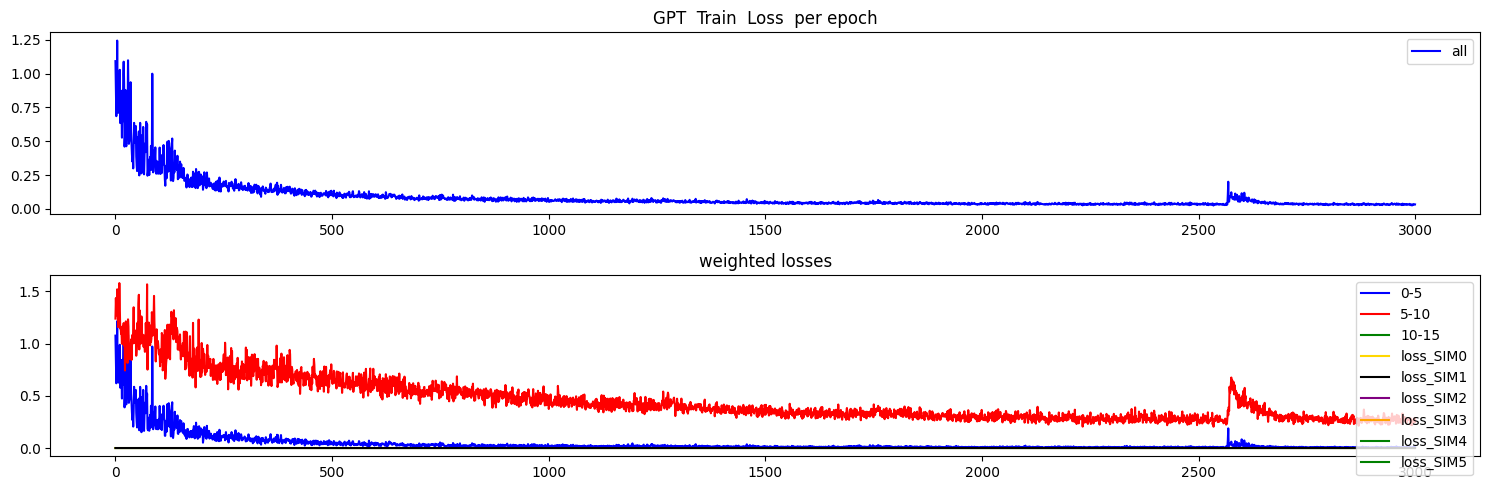

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


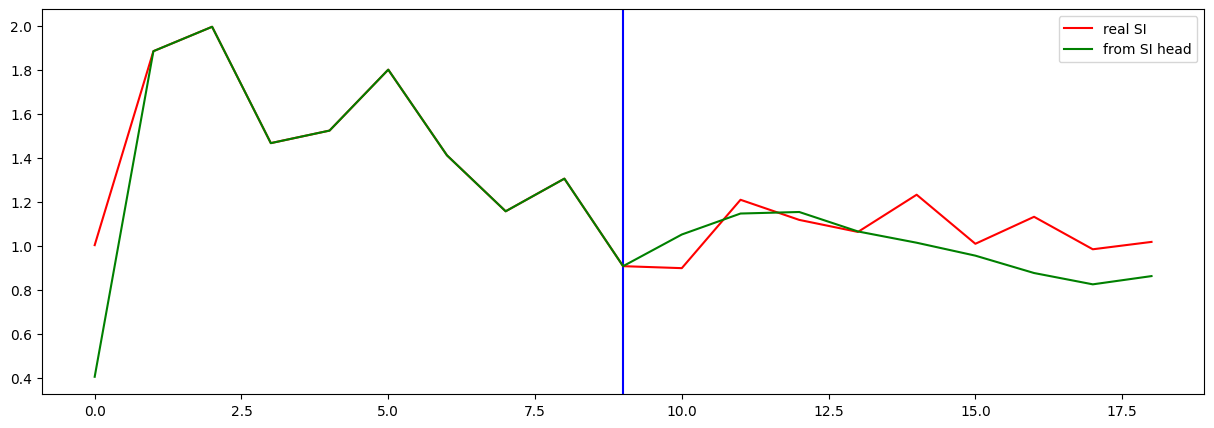

Testing R**2 - (all) - (no inputs):  0.4963402866176386
Testing R**2 - (f2) - SI full (no inputs):  -3.2254856891236523
Testing R**2 - SI head only (no inputs):  -1.3785456305819914
0 ...index R**2 (no inputs):  -1.1514340807779813
1 ...index R**2 (no inputs):  -5.317059795660382
2 ...index R**2 (no inputs):  -3.2254856891236523
3 ...index R**2 (no inputs):  -17.567256597937185
4 ...index R**2 (no inputs):  -340.1800173152076
5 ...index R**2 (no inputs):  -23.845441305735218
6 ...index R**2 (no inputs):  -3906.043356619295
7 ...index R**2 (no inputs):  -3.6225156166697703
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7347853805469882
10 ...index R**2 (no inputs):  -2.4721854342134404
11 ...index R**2 (no inputs):  -5.596883744022337
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8713923746879133
16 ...index R**2 (no inputs):  -31.887400145031847
17 ...index R**2 (no inputs):

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.667954
Loss_SI: 0.6240970492362976 Loss_all: 1.0626665353775024
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.160825
Loss_SI: 0.11027900874614716 Loss_all: 0.6157419085502625
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.080943
Loss_SI: 0.02909104712307453 Loss_all: 0.5476095080375671
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.069306
Loss_SI: 0.02264886349439621 Loss_all: 0.48922473192214966
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.057342
Loss_SI: 0.021301859989762306 Loss_all: 0.3816990256309509
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.062969
Loss_SI: 0.01983901485800743 Loss_all: 0.45113420486450195
Prediction shape: torch.Size([32, 35])
===


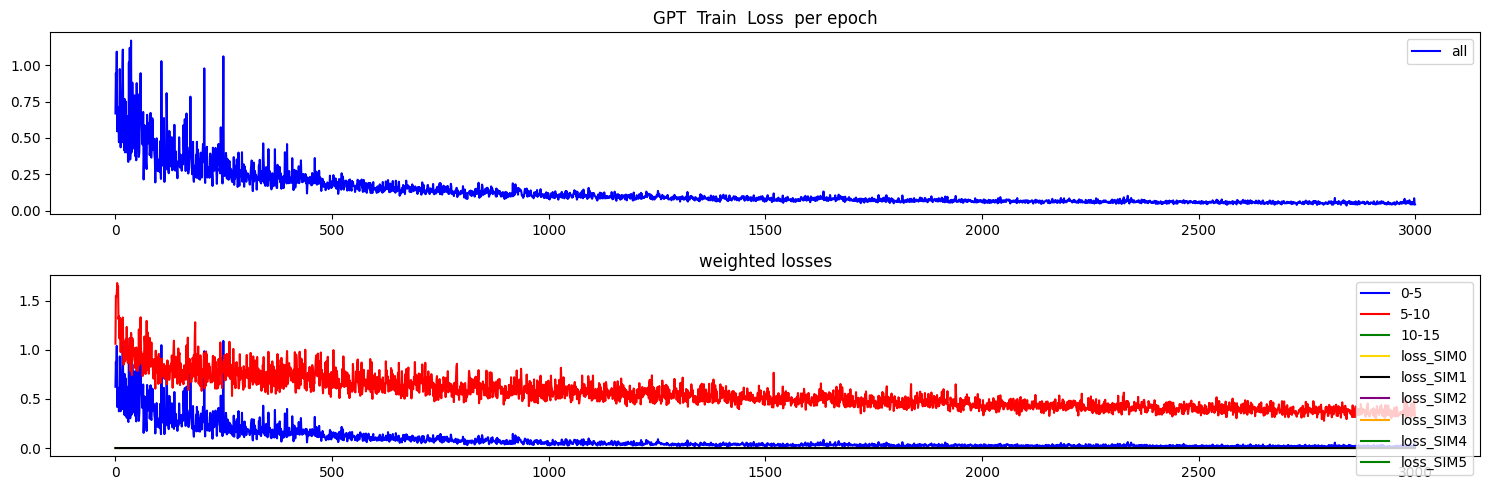

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


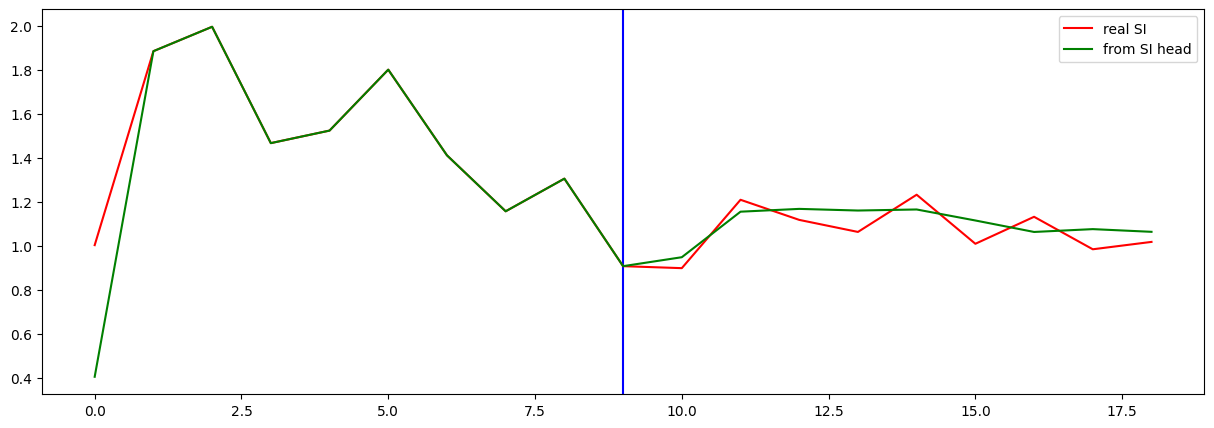

Testing R**2 - (all) - (no inputs):  0.7219840397422974
Testing R**2 - (f2) - SI full (no inputs):  -17.012757356861915
Testing R**2 - SI head only (no inputs):  -0.8166126680997843
0 ...index R**2 (no inputs):  -0.04591534357013516
1 ...index R**2 (no inputs):  -10.661726939335548
2 ...index R**2 (no inputs):  -17.012757356861915
3 ...index R**2 (no inputs):  -18.11775696782605
4 ...index R**2 (no inputs):  -77.09670672008401
5 ...index R**2 (no inputs):  -12.70181270591347
6 ...index R**2 (no inputs):  -1501.5593147465588
7 ...index R**2 (no inputs):  -1.613442662750587
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.13341746646596375
10 ...index R**2 (no inputs):  0.17432150356628606
11 ...index R**2 (no inputs):  -692.962051637499
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7821620768707334
16 ...index R**2 (no inputs):  -0.37243113129796823
17 ...index R**2 (no inputs):

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.816875
Loss_SI: 0.7350996136665344 Loss_all: 1.5528486967086792
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.469649
Loss_SI: 0.43899479508399963 Loss_all: 0.7455320358276367
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.129181
Loss_SI: 0.07483187317848206 Loss_all: 0.6183276176452637
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.108154
Loss_SI: 0.05658797174692154 Loss_all: 0.5722528696060181
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.099019
Loss_SI: 0.054279670119285583 Loss_all: 0.5016723871231079
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.084202
Loss_SI: 0.03652998059988022 Loss_all: 0.5132491588592529
Prediction shape: torch.Size([32, 35])
===


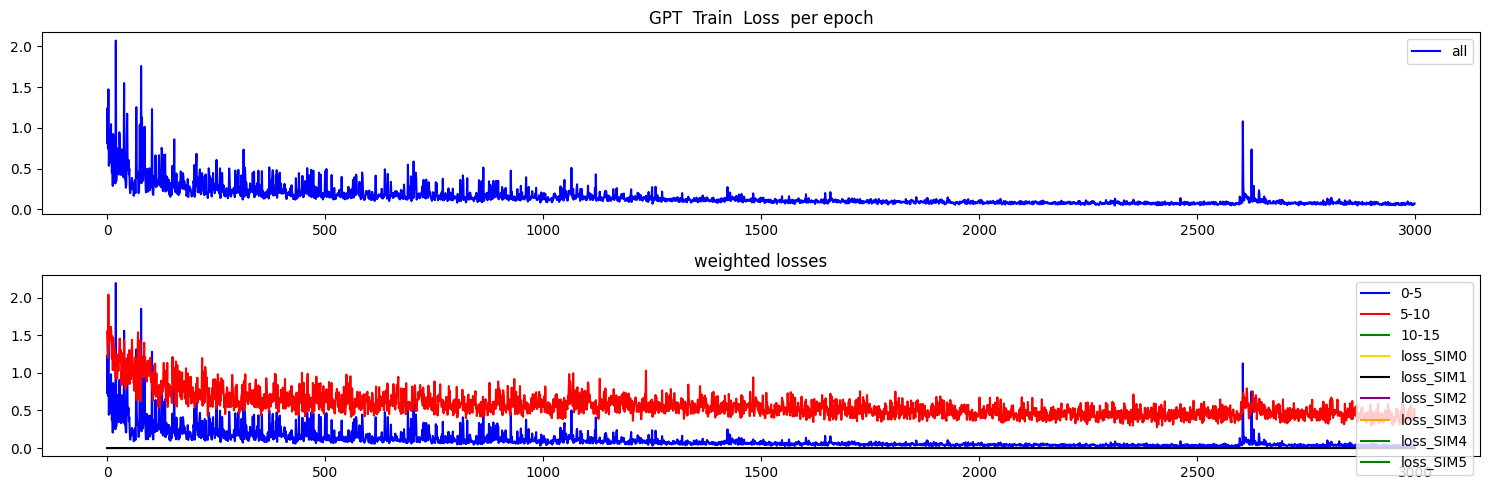

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


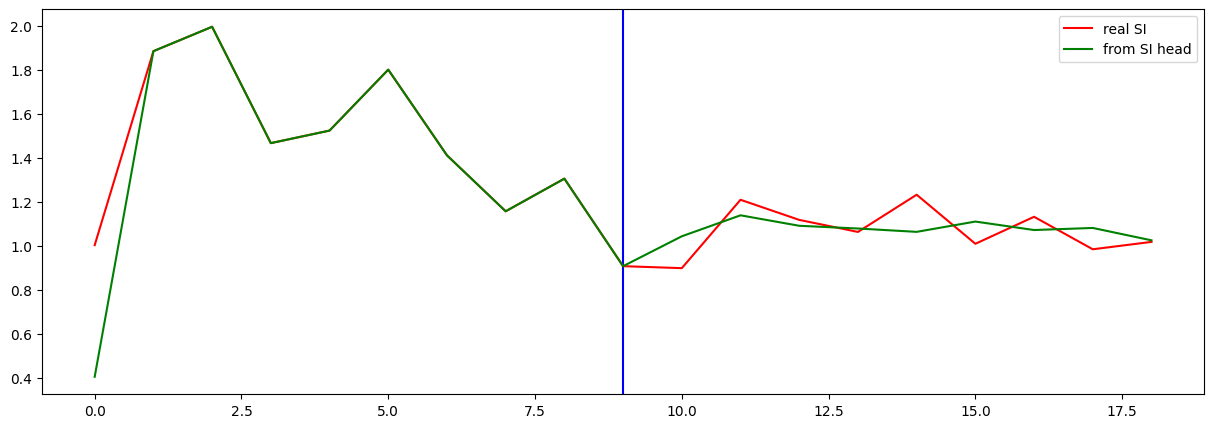

Testing R**2 - (all) - (no inputs):  0.9267992292312194
Testing R**2 - (f2) - SI full (no inputs):  -3.244995708350988
Testing R**2 - SI head only (no inputs):  0.0012980099484801721
0 ...index R**2 (no inputs):  -0.01717877548675162
1 ...index R**2 (no inputs):  -1.8705436132863982
2 ...index R**2 (no inputs):  -3.244995708350988
3 ...index R**2 (no inputs):  -3.185495364305708
4 ...index R**2 (no inputs):  -294.2401587727564
5 ...index R**2 (no inputs):  -2.6052048956416978
6 ...index R**2 (no inputs):  -12576.467310722612
7 ...index R**2 (no inputs):  -0.3297062396264312
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2778285992144036
10 ...index R**2 (no inputs):  0.10056824032358502
11 ...index R**2 (no inputs):  -81.21630724205352
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.9465227663209888
16 ...index R**2 (no inputs):  0.18211034788311353
17 ...index R**2 (no inputs

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.701838
Loss_SI: 0.6506547927856445 Loss_all: 1.162485122680664
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.194057
Loss_SI: 0.15143314003944397 Loss_all: 0.5776684284210205
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.269168
Loss_SI: 0.21163280308246613 Loss_all: 0.7869855761528015
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.126230
Loss_SI: 0.08499029278755188 Loss_all: 0.49738654494285583
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.126493
Loss_SI: 0.07728421688079834 Loss_all: 0.569374680519104
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.115822
Loss_SI: 0.08541890233755112 Loss_all: 0.38944894075393677
Prediction shape: torch.Size([32, 35])
===


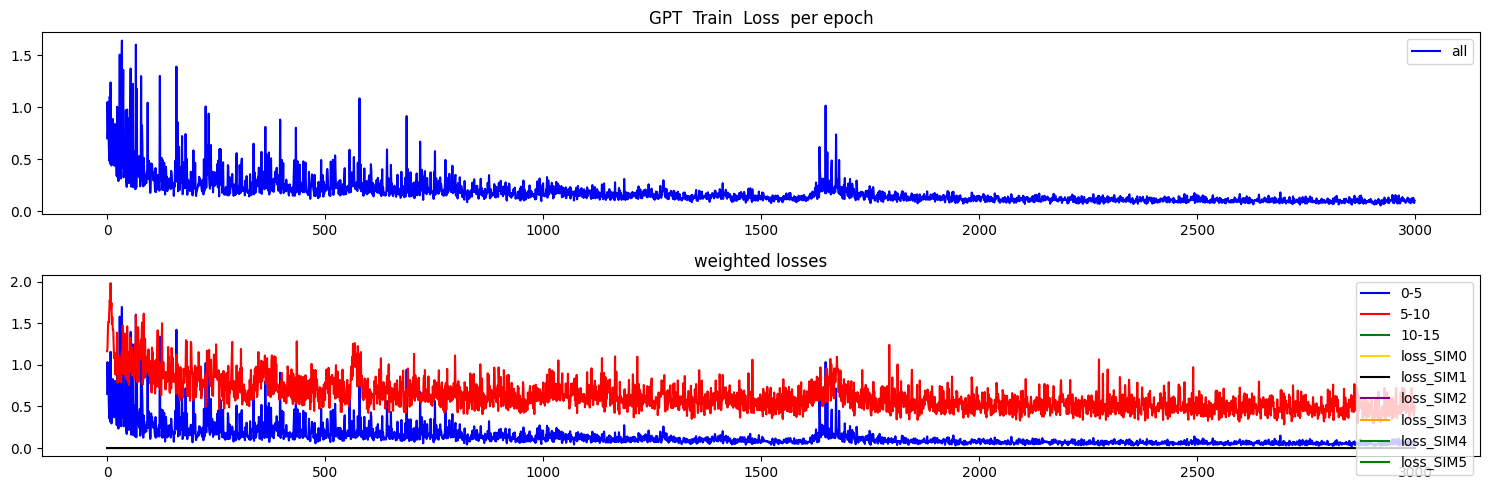

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


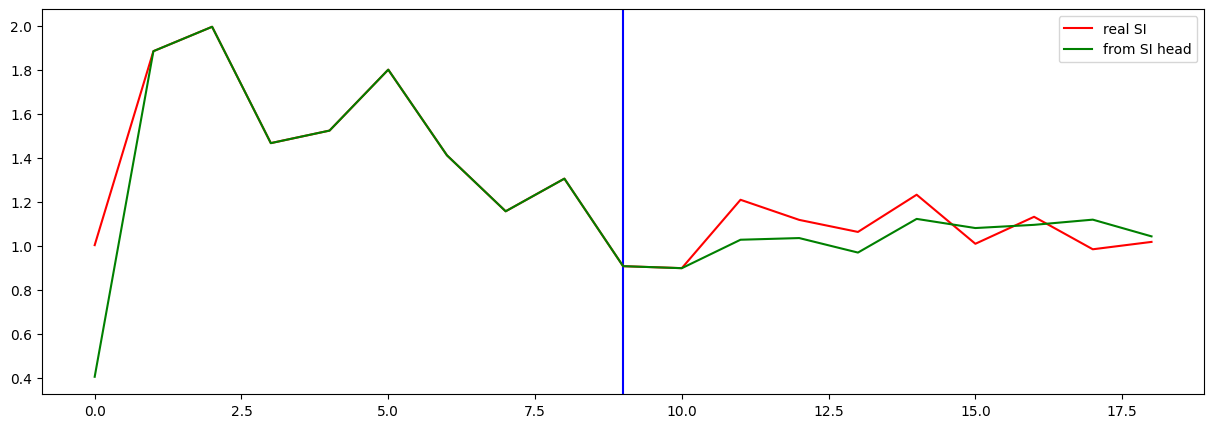

Testing R**2 - (all) - (no inputs):  0.9808013502413375
Testing R**2 - (f2) - SI full (no inputs):  -4.497398176286945
Testing R**2 - SI head only (no inputs):  -2.151736463865067
0 ...index R**2 (no inputs):  -0.20394298182377235
1 ...index R**2 (no inputs):  -2.241973114806514
2 ...index R**2 (no inputs):  -4.497398176286945
3 ...index R**2 (no inputs):  -4.526201105130861
4 ...index R**2 (no inputs):  -704.1605998156515
5 ...index R**2 (no inputs):  0.11411512096338494
6 ...index R**2 (no inputs):  -228.2563998515476
7 ...index R**2 (no inputs):  -1.1181332657922076
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.036660180228748285
10 ...index R**2 (no inputs):  -0.2977929692720742
11 ...index R**2 (no inputs):  -453.77389225455084
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.24774737964665294
16 ...index R**2 (no inputs):  0.6157865336188291
17 ...index R**2 (no inputs): 

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.104489
Loss_SI: 1.0729186534881592 Loss_all: 1.3886221647262573
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.108555
Loss_SI: 0.05009256675839424 Loss_all: 0.6347126364707947
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.053412
Loss_SI: 0.020781926810741425 Loss_all: 0.34708505868911743
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.035238
Loss_SI: 0.005786761175841093 Loss_all: 0.30030274391174316
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.032896
Loss_SI: 0.006715793162584305 Loss_all: 0.2685134708881378
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.038946
Loss_SI: 0.007091565988957882 Loss_all: 0.3256327211856842
Prediction shape: torch.Size([32, 35])
===


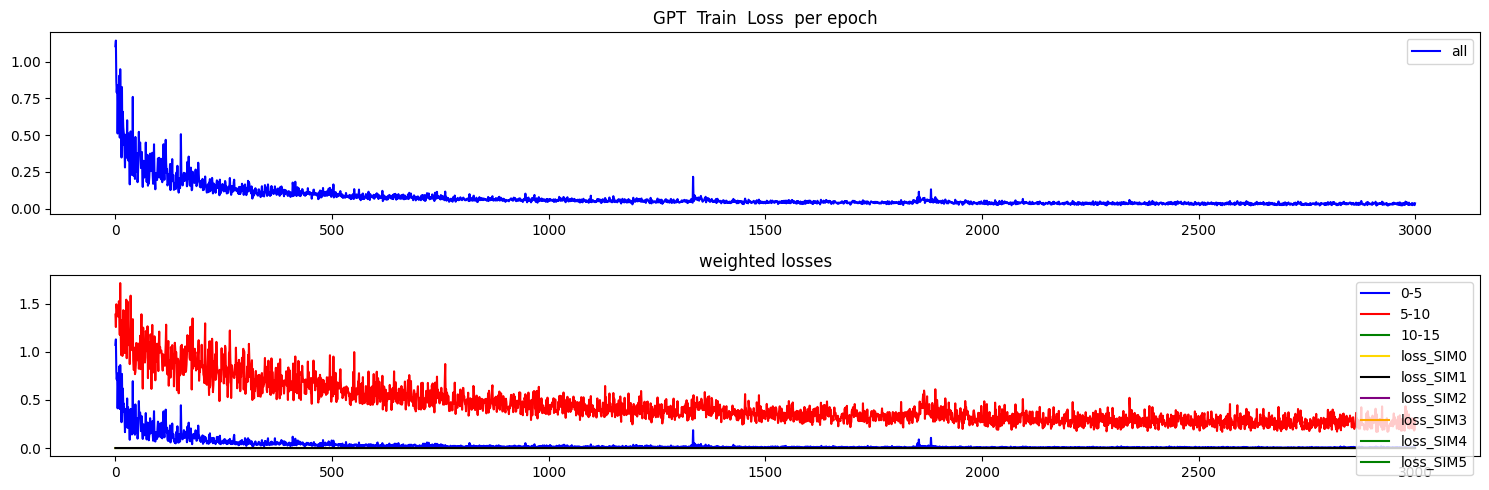

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


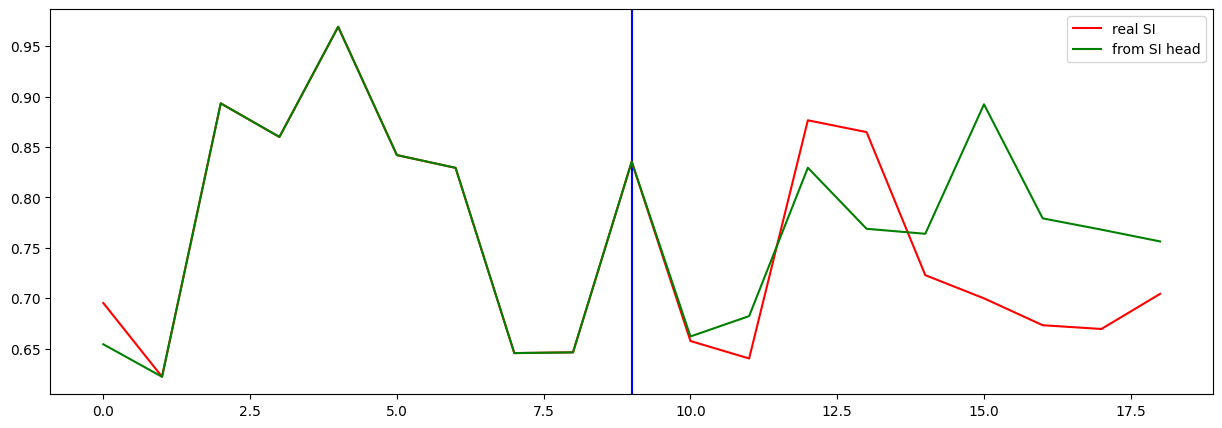

Testing R**2 - (all) - (no inputs):  0.9981900627709489
Testing R**2 - (f2) - SI full (no inputs):  -0.8610165988399789
Testing R**2 - SI head only (no inputs):  -0.9799849129691738
0 ...index R**2 (no inputs):  0.050692760792206526
1 ...index R**2 (no inputs):  -1.9203424158257283
2 ...index R**2 (no inputs):  -0.8610165988399789
3 ...index R**2 (no inputs):  -1.7656494246858818
4 ...index R**2 (no inputs):  -9.216283479292864
5 ...index R**2 (no inputs):  -3.173197447368742
6 ...index R**2 (no inputs):  -22.418084817026493
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5273994929591646
10 ...index R**2 (no inputs):  0.520780098389603
11 ...index R**2 (no inputs):  -3.898746023373808
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -7.4999621452487055
16 ...index R**2 (no inputs):  -0.03532488254323751
17 ...index R**2 (no inputs):  -1.0027353221

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.112042
Loss_SI: 1.0904909372329712 Loss_all: 1.3059993982315063
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.146631
Loss_SI: 0.10499142110347748 Loss_all: 0.5213896632194519
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.109583
Loss_SI: 0.05406082421541214 Loss_all: 0.6092805862426758
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.074317
Loss_SI: 0.033336181193590164 Loss_all: 0.44314897060394287
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.068014
Loss_SI: 0.03195800632238388 Loss_all: 0.39252230525016785
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.061844
Loss_SI: 0.02284425124526024 Loss_all: 0.4128420054912567
Prediction shape: torch.Size([32, 35])
===


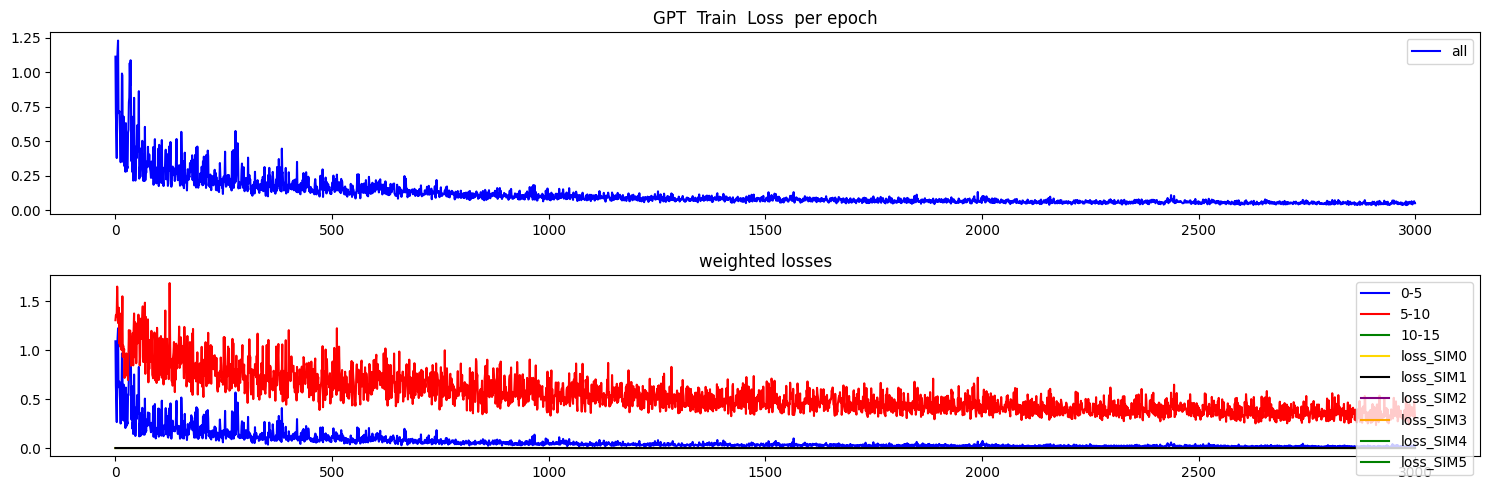

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


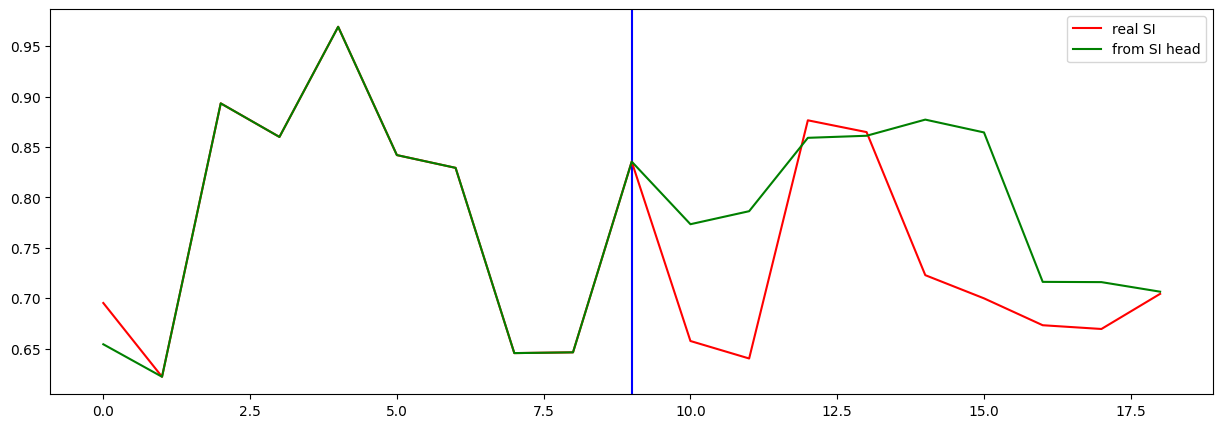

Testing R**2 - (all) - (no inputs):  0.9991712638183924
Testing R**2 - (f2) - SI full (no inputs):  0.1419285512728088
Testing R**2 - SI head only (no inputs):  -1.0140293241119185
0 ...index R**2 (no inputs):  0.3797063046344413
1 ...index R**2 (no inputs):  -1.9128571204083933
2 ...index R**2 (no inputs):  0.1419285512728088
3 ...index R**2 (no inputs):  -16.254829472494393
4 ...index R**2 (no inputs):  -2.223191474302911
5 ...index R**2 (no inputs):  -0.8966327950846007
6 ...index R**2 (no inputs):  -671.2569416799197
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4134132895645859
10 ...index R**2 (no inputs):  0.4279153192032805
11 ...index R**2 (no inputs):  -141.512874070601
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.338902198383753
16 ...index R**2 (no inputs):  -0.14046887307808253
17 ...index R**2 (no inputs):  -11.14522998078418

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.194630
Loss_SI: 1.1669189929962158 Loss_all: 1.4440256357192993
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.314905
Loss_SI: 0.2597302198410034 Loss_all: 0.8114798069000244
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.102330
Loss_SI: 0.05904429778456688 Loss_all: 0.4919004440307617
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.130104
Loss_SI: 0.07594506442546844 Loss_all: 0.6175378561019897
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.117705
Loss_SI: 0.06635469943284988 Loss_all: 0.5798539519309998
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.082314
Loss_SI: 0.03285816311836243 Loss_all: 0.5274178385734558
Prediction shape: torch.Size([32, 35])
===


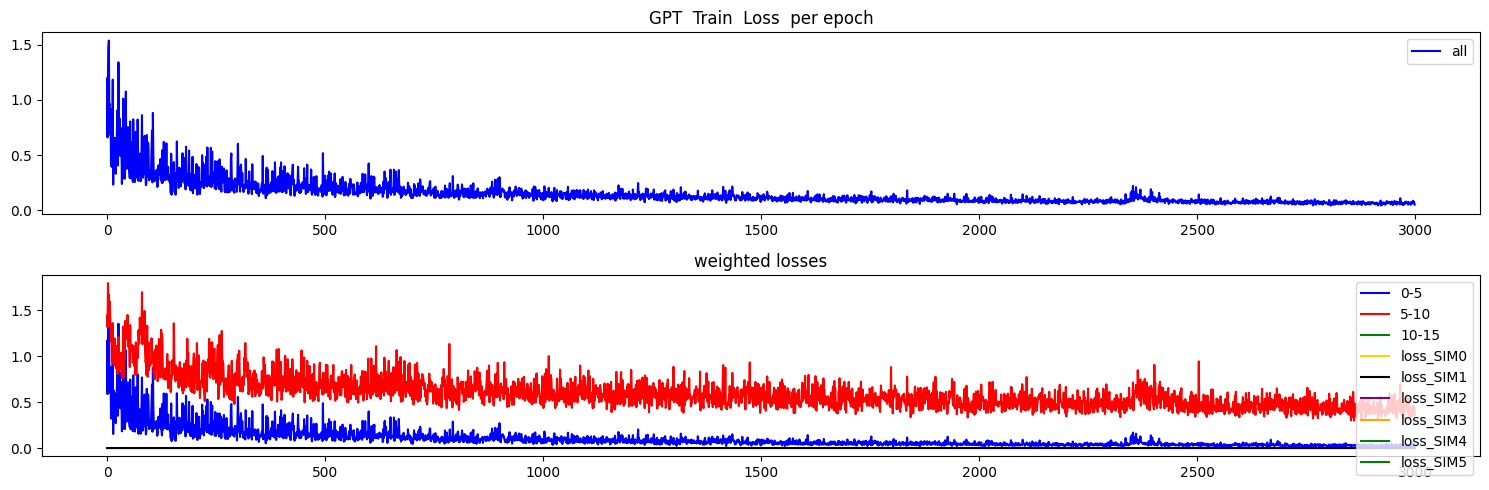

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


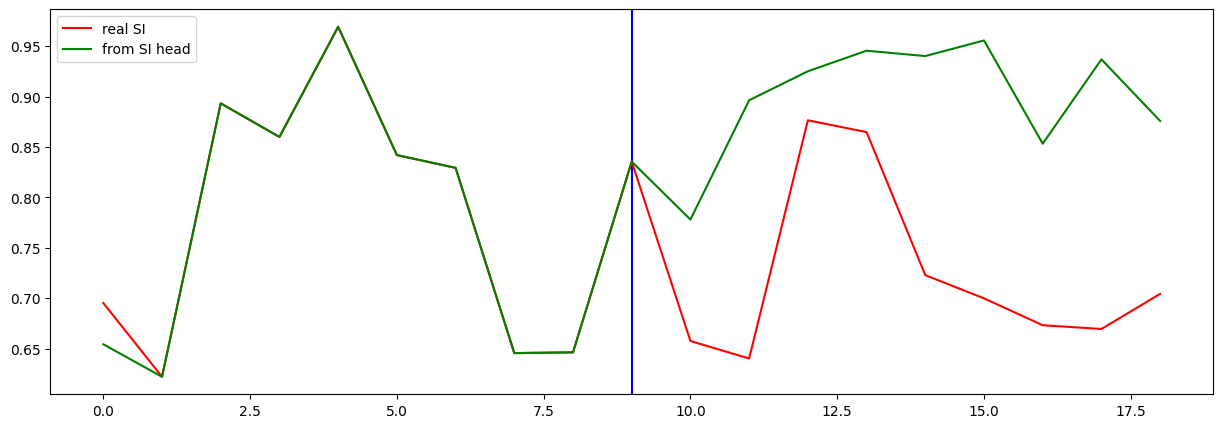

Testing R**2 - (all) - (no inputs):  0.9952186694853704
Testing R**2 - (f2) - SI full (no inputs):  -4.7293056871377495
Testing R**2 - SI head only (no inputs):  -4.766806183005141
0 ...index R**2 (no inputs):  -0.38776639236428223
1 ...index R**2 (no inputs):  -5.287201852443945
2 ...index R**2 (no inputs):  -4.7293056871377495
3 ...index R**2 (no inputs):  -48.383226889876624
4 ...index R**2 (no inputs):  -218.2828797826782
5 ...index R**2 (no inputs):  -10.025440004492733
6 ...index R**2 (no inputs):  -94.0713938853161
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1824934765912931
10 ...index R**2 (no inputs):  -0.42709687518618766
11 ...index R**2 (no inputs):  -42.2615796009495
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.38574405261768985
16 ...index R**2 (no inputs):  -0.246059828444797
17 ...index R**2 (no inputs):  -53.38275827289

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.521333
Loss_SI: 0.4039612412452698 Loss_all: 1.5776801109313965
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.240661
Loss_SI: 0.18270859122276306 Loss_all: 0.7622351050376892
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.148079
Loss_SI: 0.08400097489356995 Loss_all: 0.7247835993766785
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.211242
Loss_SI: 0.13987645506858826 Loss_all: 0.8535346984863281
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.109223
Loss_SI: 0.05846613645553589 Loss_all: 0.5660369992256165
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.090735
Loss_SI: 0.029362283647060394 Loss_all: 0.6430859565734863
Prediction shape: torch.Size([32, 35])
===


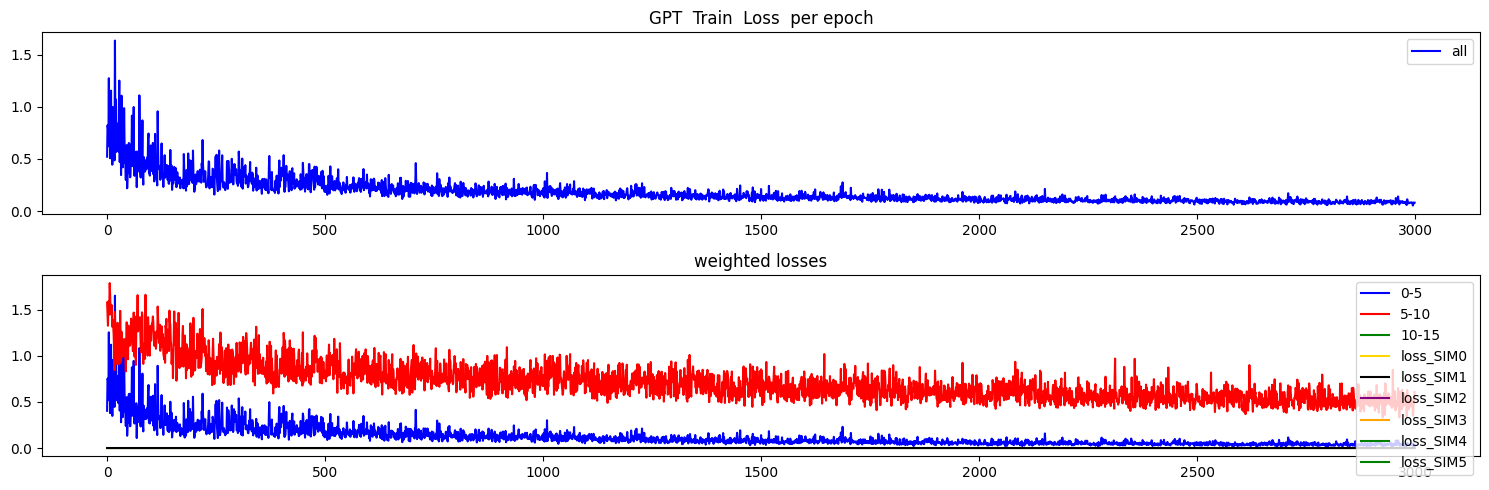

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


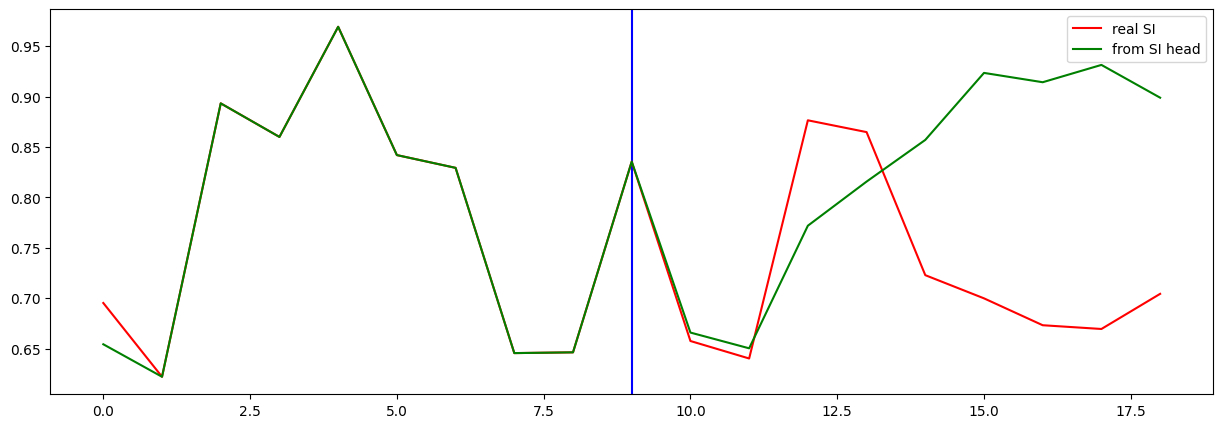

Testing R**2 - (all) - (no inputs):  0.9947320671501119
Testing R**2 - (f2) - SI full (no inputs):  -5.596086890894097
Testing R**2 - SI head only (no inputs):  -4.39547593946555
0 ...index R**2 (no inputs):  -0.008258681041432014
1 ...index R**2 (no inputs):  -3.134204445156115
2 ...index R**2 (no inputs):  -5.596086890894097
3 ...index R**2 (no inputs):  -558.4288659477498
4 ...index R**2 (no inputs):  -138.74771698536196
5 ...index R**2 (no inputs):  -10.362187468291163
6 ...index R**2 (no inputs):  -410.40305086019856
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.751348232581375
10 ...index R**2 (no inputs):  0.03875550761737312
11 ...index R**2 (no inputs):  -662.0766795504057
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8850610123368503
16 ...index R**2 (no inputs):  -0.7085096722020923
17 ...index R**2 (no inputs):  -1063.2118129882

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.689754
Loss_SI: 0.6363619565963745 Loss_all: 1.1702805757522583
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.125021
Loss_SI: 0.06130066514015198 Loss_all: 0.6985073089599609
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.062062
Loss_SI: 0.017566079273819923 Loss_all: 0.4625284969806671
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.070963
Loss_SI: 0.029772397130727768 Loss_all: 0.4416828155517578
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.041038
Loss_SI: 0.010710046626627445 Loss_all: 0.3139895498752594
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.045803
Loss_SI: 0.01238337717950344 Loss_all: 0.3465832769870758
Prediction shape: torch.Size([32, 35])
===


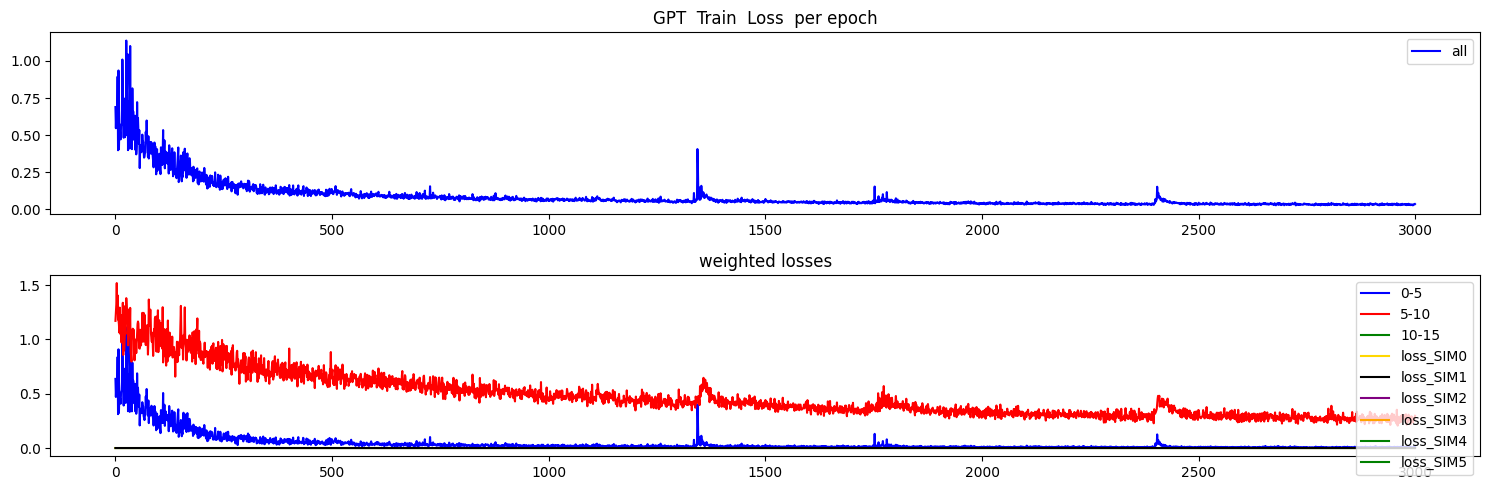

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


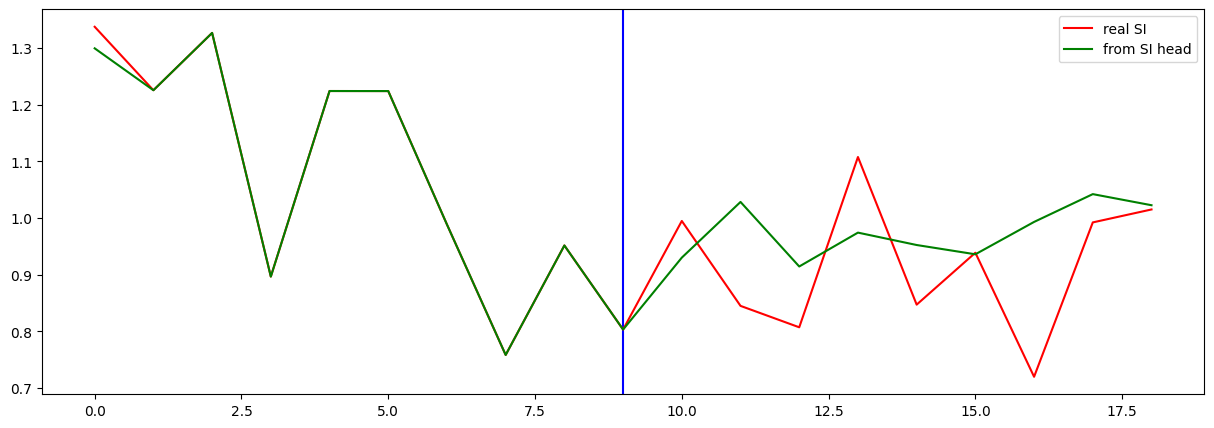

Testing R**2 - (all) - (no inputs):  0.9388753988679532
Testing R**2 - (f2) - SI full (no inputs):  -0.17110965580440074
Testing R**2 - SI head only (no inputs):  0.06987994436458433
0 ...index R**2 (no inputs):  -0.21473071923771392
1 ...index R**2 (no inputs):  -0.2192317484079931
2 ...index R**2 (no inputs):  -0.17110965580440074
3 ...index R**2 (no inputs):  -21.370320054470604
4 ...index R**2 (no inputs):  -134.0102016793033
5 ...index R**2 (no inputs):  -230.7945382420491
6 ...index R**2 (no inputs):  -197.3974776799286
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.3328850234179401
10 ...index R**2 (no inputs):  -2.1512090124593093
11 ...index R**2 (no inputs):  -11.485347153083328
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.316262347396256
16 ...index R**2 (no inputs):  -0.367772237285354
17 ...index R**2 (no inputs):  -10.60966711

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.606967
Loss_SI: 0.5683509111404419 Loss_all: 0.9545145630836487
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.197195
Loss_SI: 0.12373409420251846 Loss_all: 0.8583462834358215
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.100286
Loss_SI: 0.03564142435789108 Loss_all: 0.6820892691612244
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.085835
Loss_SI: 0.034755442291498184 Loss_all: 0.5455529093742371
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.077165
Loss_SI: 0.022285474464297295 Loss_all: 0.5710839629173279
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.063418
Loss_SI: 0.023753829300403595 Loss_all: 0.4203955829143524
Prediction shape: torch.Size([32, 35])
===


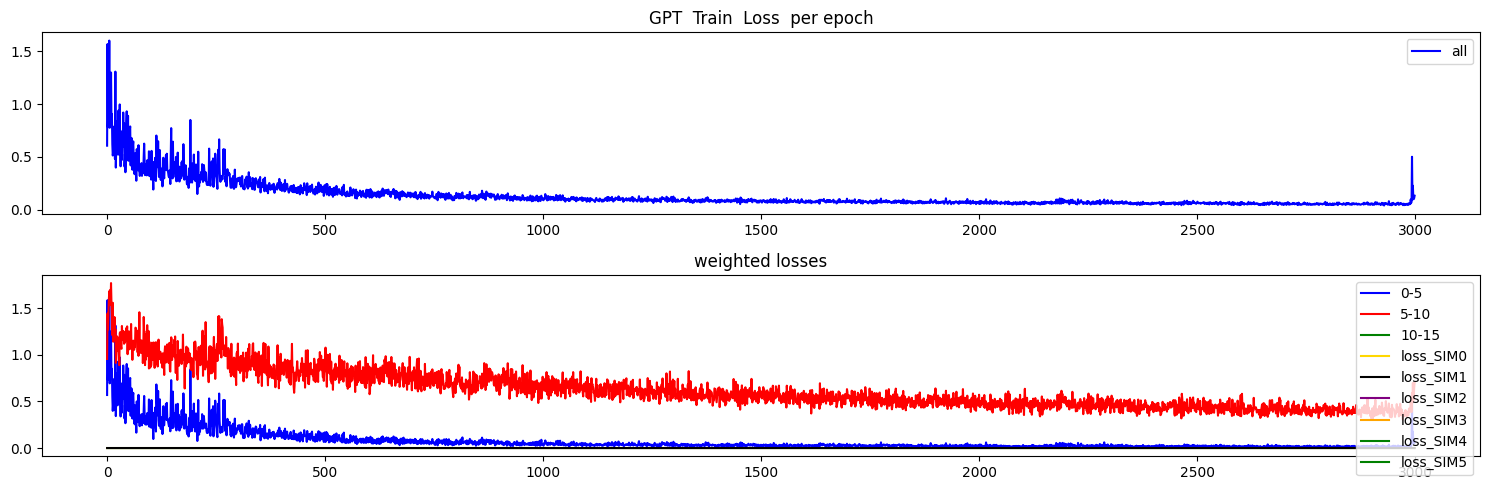

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


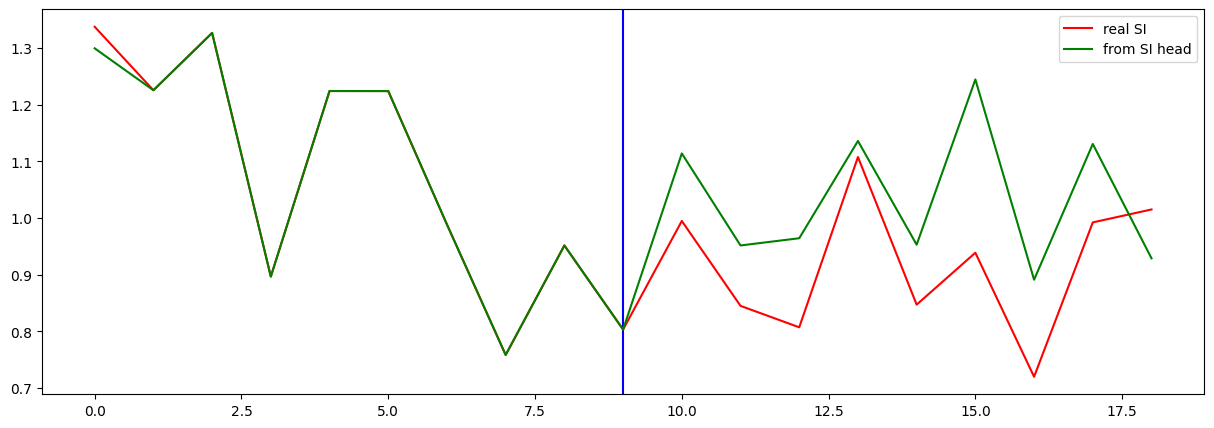

Testing R**2 - (all) - (no inputs):  0.9805936229414451
Testing R**2 - (f2) - SI full (no inputs):  -0.29158988036393607
Testing R**2 - SI head only (no inputs):  -1.4053496978779543
0 ...index R**2 (no inputs):  -0.10945310465767655
1 ...index R**2 (no inputs):  -0.06560449714857697
2 ...index R**2 (no inputs):  -0.29158988036393607
3 ...index R**2 (no inputs):  -32.38213782233933
4 ...index R**2 (no inputs):  -318.7094466604686
5 ...index R**2 (no inputs):  -72.16179677216367
6 ...index R**2 (no inputs):  -4818.145959332383
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2781374472320004
10 ...index R**2 (no inputs):  -0.240990567392815
11 ...index R**2 (no inputs):  -96.93705726622392
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -12.5884861433717
16 ...index R**2 (no inputs):  -0.991434779991758
17 ...index R**2 (no inputs):  -213.5818502398

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.498089
Loss_SI: 0.4337865710258484 Loss_all: 1.076806664466858
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.278681
Loss_SI: 0.20679381489753723 Loss_all: 0.9256704449653625
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.149652
Loss_SI: 0.09628823399543762 Loss_all: 0.6299286484718323
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.157966
Loss_SI: 0.09456785768270493 Loss_all: 0.7285525798797607
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.120749
Loss_SI: 0.06922589987516403 Loss_all: 0.5844571590423584
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.067077
Loss_SI: 0.026542436331510544 Loss_all: 0.4318889081478119
Prediction shape: torch.Size([32, 35])
===


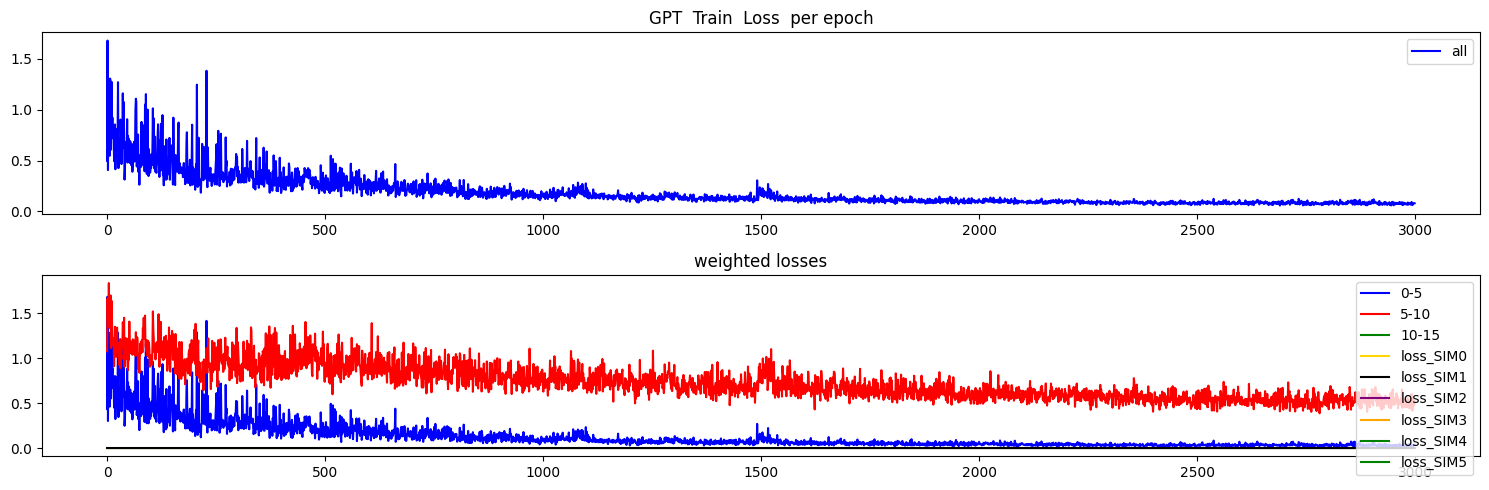

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


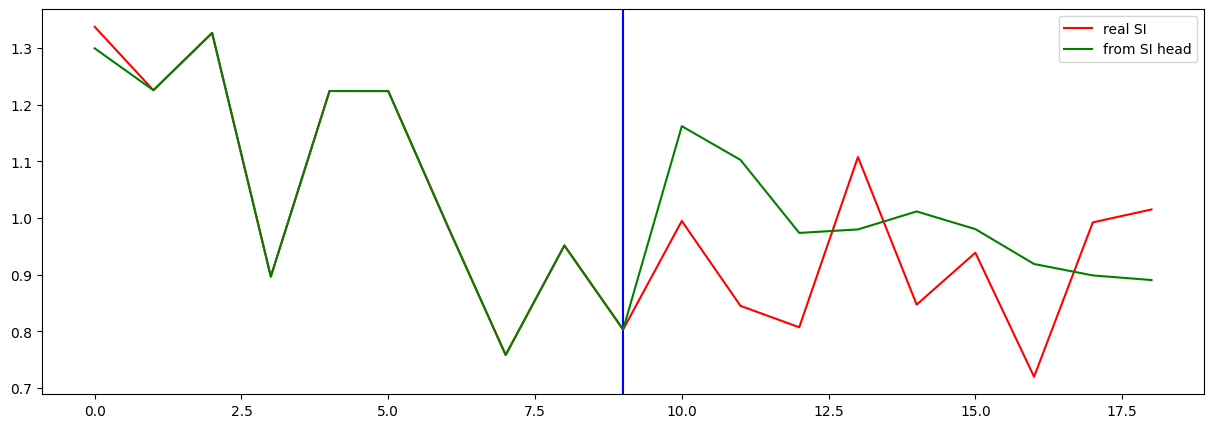

Testing R**2 - (all) - (no inputs):  0.9504688590990156
Testing R**2 - (f2) - SI full (no inputs):  -0.9608655189458444
Testing R**2 - SI head only (no inputs):  -0.8685883742034184
0 ...index R**2 (no inputs):  -0.8090734812119993
1 ...index R**2 (no inputs):  -0.6384227913900007
2 ...index R**2 (no inputs):  -0.9608655189458444
3 ...index R**2 (no inputs):  -1.1601911166949543
4 ...index R**2 (no inputs):  -1413.4280099086252
5 ...index R**2 (no inputs):  -186.5413213311825
6 ...index R**2 (no inputs):  -2239.0803685704213
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2107494985178615
10 ...index R**2 (no inputs):  -0.7086308623575768
11 ...index R**2 (no inputs):  -55.400647507055176
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.589701854074542
16 ...index R**2 (no inputs):  -0.08223260326751225
17 ...index R**2 (no inputs):  -353.928237

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.646904
Loss_SI: 0.5750961899757385 Loss_all: 1.2931756973266602
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.208131
Loss_SI: 0.1641034483909607 Loss_all: 0.604377806186676
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.168690
Loss_SI: 0.12704338133335114 Loss_all: 0.5435101389884949
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.118275
Loss_SI: 0.07344277203083038 Loss_all: 0.5217603445053101
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.123918
Loss_SI: 0.06866459548473358 Loss_all: 0.6212018132209778
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.143300
Loss_SI: 0.09593015909194946 Loss_all: 0.5696256160736084
Prediction shape: torch.Size([32, 35])
===


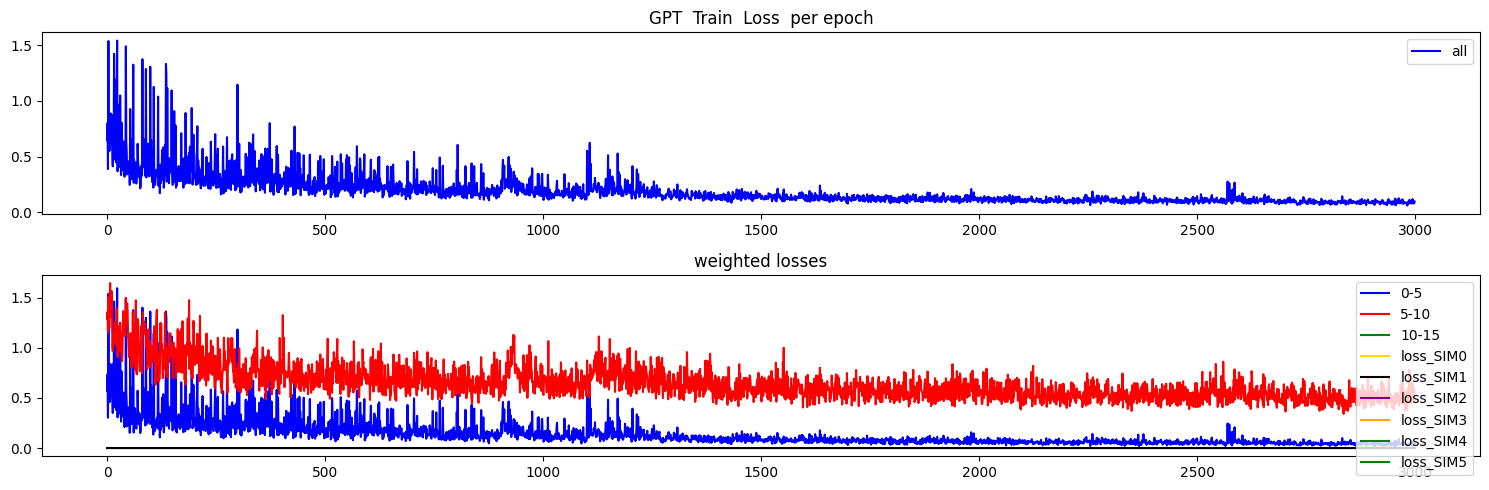

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


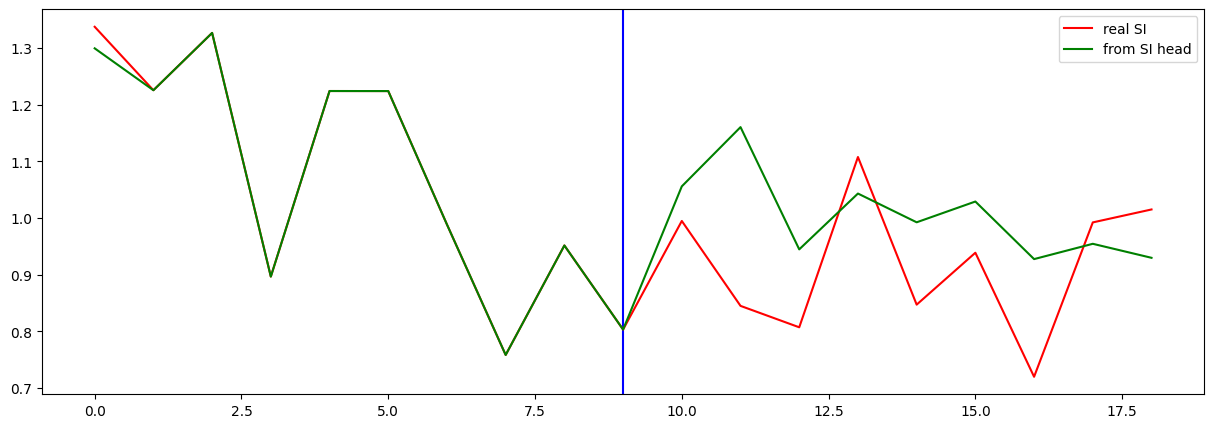

Testing R**2 - (all) - (no inputs):  0.991877799007287
Testing R**2 - (f2) - SI full (no inputs):  -0.1201822912417827
Testing R**2 - SI head only (no inputs):  -0.8382946356440171
0 ...index R**2 (no inputs):  -0.21868888602292813
1 ...index R**2 (no inputs):  -0.3058854563532012
2 ...index R**2 (no inputs):  -0.1201822912417827
3 ...index R**2 (no inputs):  -44.14390621523102
4 ...index R**2 (no inputs):  -220.60057842655576
5 ...index R**2 (no inputs):  -29.454329643310253
6 ...index R**2 (no inputs):  -11980.962728940589
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3846783014062063
10 ...index R**2 (no inputs):  -0.5464985195740835
11 ...index R**2 (no inputs):  -313.3362349766089
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -13.726657066880447
16 ...index R**2 (no inputs):  -0.3071632467695138
17 ...index R**2 (no inputs):  -398.1261180

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.812400
Loss_SI: 0.7660932540893555 Loss_all: 1.2291616201400757
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.101833
Loss_SI: 0.03749769181013107 Loss_all: 0.6808505654335022
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.079188
Loss_SI: 0.020706191658973694 Loss_all: 0.6055260896682739
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.060315
Loss_SI: 0.021221507340669632 Loss_all: 0.4121547043323517
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.053870
Loss_SI: 0.017853181809186935 Loss_all: 0.3780197203159332
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.041620
Loss_SI: 0.011901220306754112 Loss_all: 0.3090929687023163
Prediction shape: torch.Size([32, 35])
===


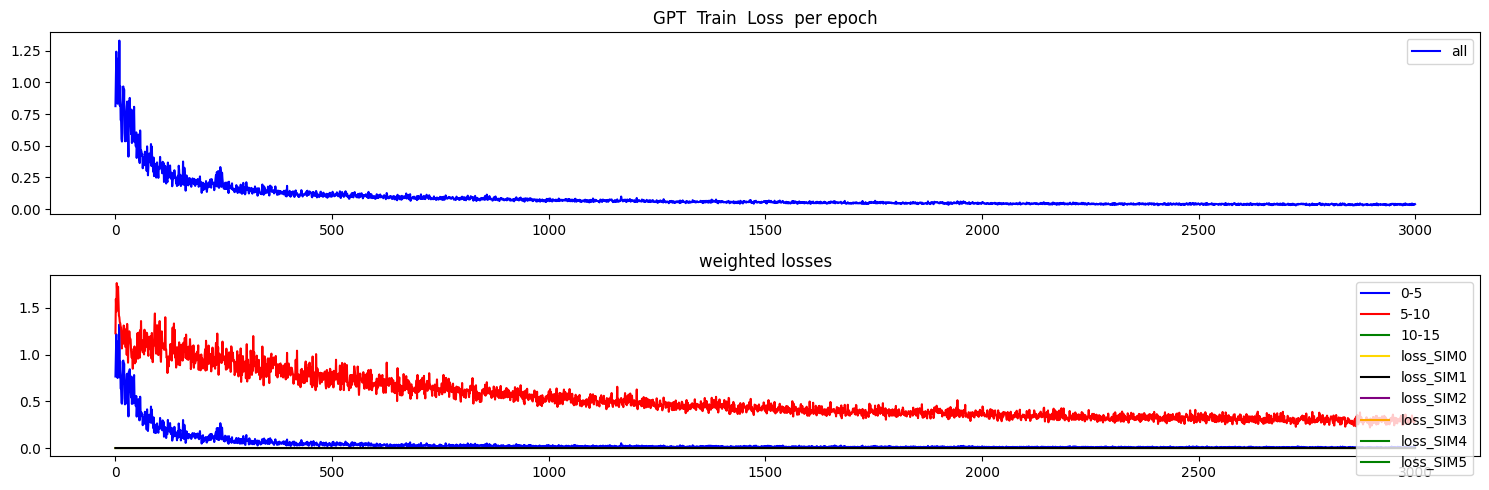

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


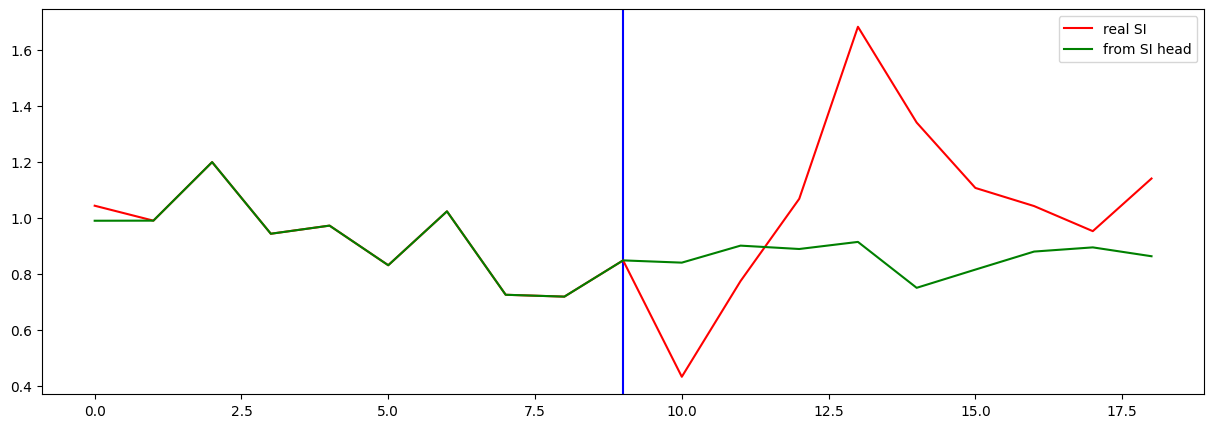

Testing R**2 - (all) - (no inputs):  0.9794650710723733
Testing R**2 - (f2) - SI full (no inputs):  -1.1994969534070563
Testing R**2 - SI head only (no inputs):  -1.1260470950257053
0 ...index R**2 (no inputs):  0.031139553946308518
1 ...index R**2 (no inputs):  -2.296888348257485
2 ...index R**2 (no inputs):  -1.1994969534070563
3 ...index R**2 (no inputs):  -42.19972491830878
4 ...index R**2 (no inputs):  -0.5754106940574863
5 ...index R**2 (no inputs):  -0.03116854176518835
6 ...index R**2 (no inputs):  -1.1530310284475012
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5245278547018284
10 ...index R**2 (no inputs):  -0.2919607024492479
11 ...index R**2 (no inputs):  -85.44708261206011
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3324787542102059
16 ...index R**2 (no inputs):  0.01996038919087295
17 ...index R**2 (no inputs):  -104.762428

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.684104
Loss_SI: 0.6277256011962891 Loss_all: 1.1915059089660645
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.212834
Loss_SI: 0.13998258113861084 Loss_all: 0.8685011267662048
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.133593
Loss_SI: 0.03723850101232529 Loss_all: 1.0007855892181396
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.097031
Loss_SI: 0.02954147569835186 Loss_all: 0.7044371366500854
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.081728
Loss_SI: 0.0319119468331337 Loss_all: 0.5300691723823547
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.063782
Loss_SI: 0.020940590649843216 Loss_all: 0.4493507146835327
Prediction shape: torch.Size([32, 35])
===


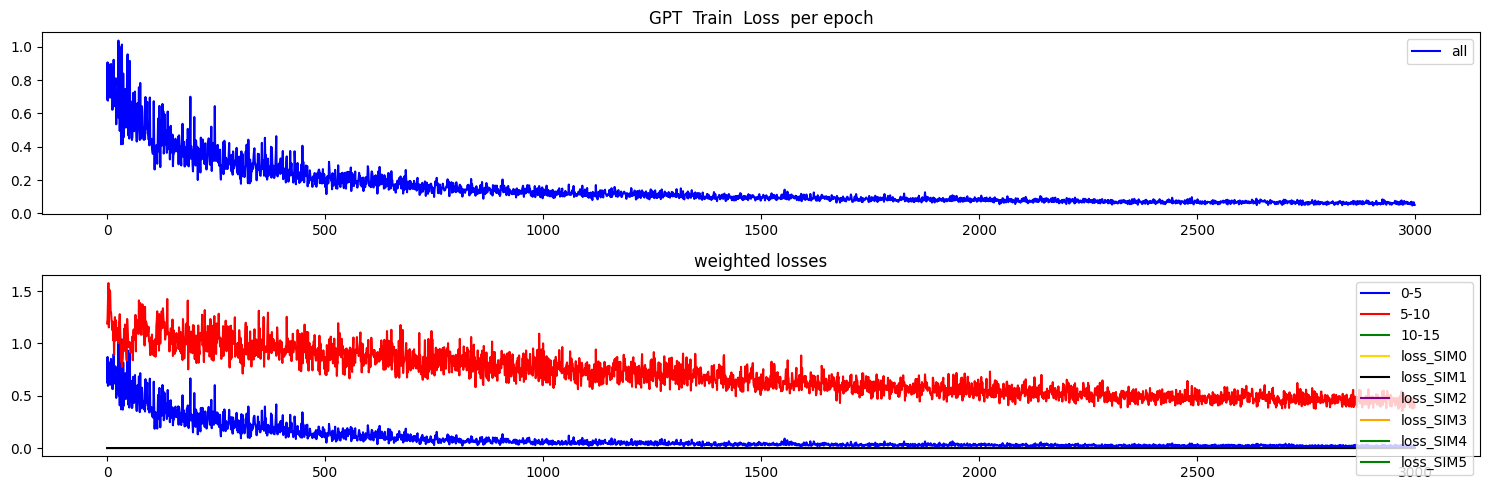

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


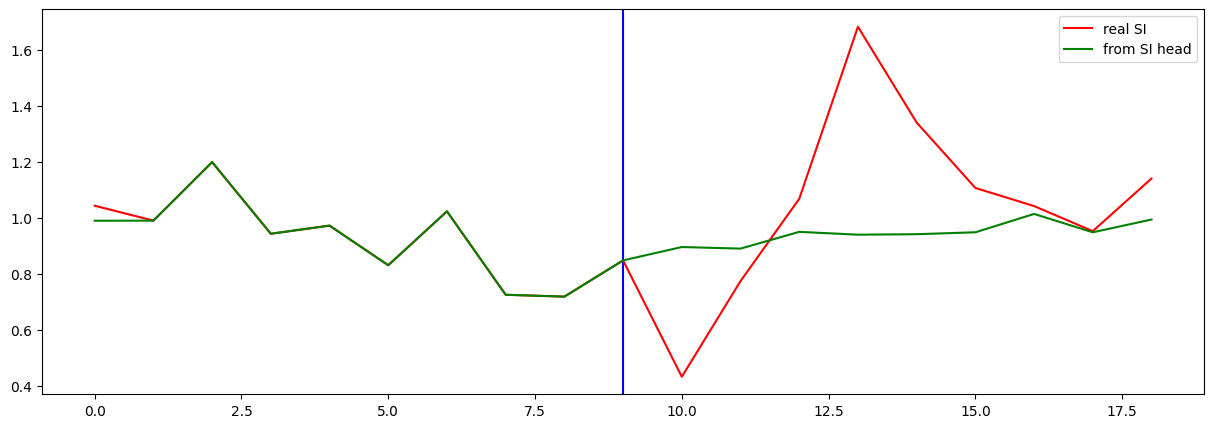

Testing R**2 - (all) - (no inputs):  0.9759558918322851
Testing R**2 - (f2) - SI full (no inputs):  -0.5690824327896418
Testing R**2 - SI head only (no inputs):  -0.5598358891734783
0 ...index R**2 (no inputs):  0.07170182263694291
1 ...index R**2 (no inputs):  -1.127735061210764
2 ...index R**2 (no inputs):  -0.5690824327896418
3 ...index R**2 (no inputs):  -40.04561966917681
4 ...index R**2 (no inputs):  -0.3858731078374009
5 ...index R**2 (no inputs):  -0.20875053506993613
6 ...index R**2 (no inputs):  -0.7736987381186791
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2976288006766914
10 ...index R**2 (no inputs):  -0.9436188558795808
11 ...index R**2 (no inputs):  -208.0661331216668
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.04486817546247335
16 ...index R**2 (no inputs):  -0.15287974631994738
17 ...index R**2 (no inputs):  -135.21297

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.613346
Loss_SI: 0.577041506767273 Loss_all: 0.9400877356529236
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.195150
Loss_SI: 0.1141698807477951 Loss_all: 0.9239677786827087
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.203585
Loss_SI: 0.1432829201221466 Loss_all: 0.7463005781173706
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.121643
Loss_SI: 0.06560240685939789 Loss_all: 0.6260122060775757
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.113953
Loss_SI: 0.057826269418001175 Loss_all: 0.6190983057022095
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.091471
Loss_SI: 0.03885362297296524 Loss_all: 0.5650310516357422
Prediction shape: torch.Size([32, 35])
===


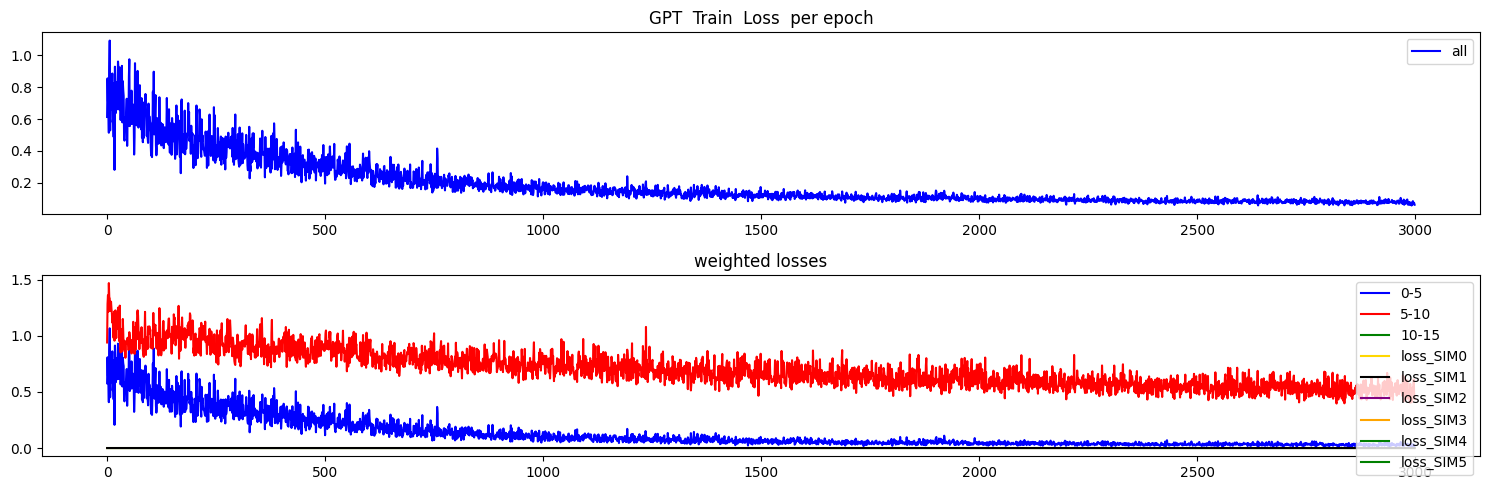

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


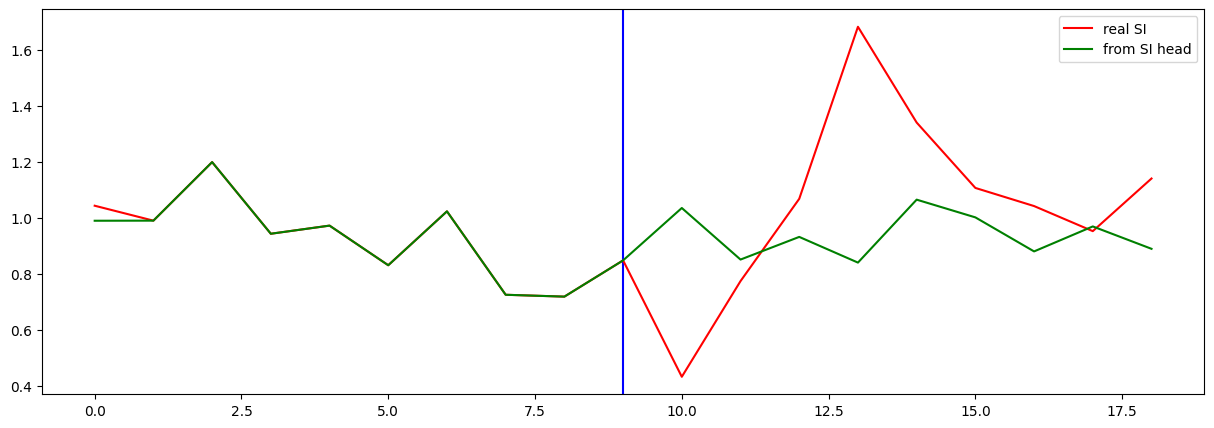

Testing R**2 - (all) - (no inputs):  0.9757180845084664
Testing R**2 - (f2) - SI full (no inputs):  -0.46177524356415756
Testing R**2 - SI head only (no inputs):  -0.8779731970126883
0 ...index R**2 (no inputs):  0.0795635310039835
1 ...index R**2 (no inputs):  -0.6786789001458955
2 ...index R**2 (no inputs):  -0.46177524356415756
3 ...index R**2 (no inputs):  -22.07783935688776
4 ...index R**2 (no inputs):  -0.15242942582959862
5 ...index R**2 (no inputs):  -0.2203140480581416
6 ...index R**2 (no inputs):  -1.1530924609018314
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.03902588058388401
10 ...index R**2 (no inputs):  0.14803822199840677
11 ...index R**2 (no inputs):  -568.3491416357272
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.31082474218984446
16 ...index R**2 (no inputs):  -0.1432691164651243
17 ...index R**2 (no inputs):  -375.5704

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.857844
Loss_SI: 0.7787207365036011 Loss_all: 1.5699542760849
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.309226
Loss_SI: 0.2290538102388382 Loss_all: 1.030774474143982
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.305747
Loss_SI: 0.24409550428390503 Loss_all: 0.8606082201004028
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.336327
Loss_SI: 0.27506959438323975 Loss_all: 0.88764488697052
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.134194
Loss_SI: 0.08702054619789124 Loss_all: 0.5587587952613831
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.108248
Loss_SI: 0.04935974255204201 Loss_all: 0.6382390260696411
Prediction shape: torch.Size([32, 35])
===


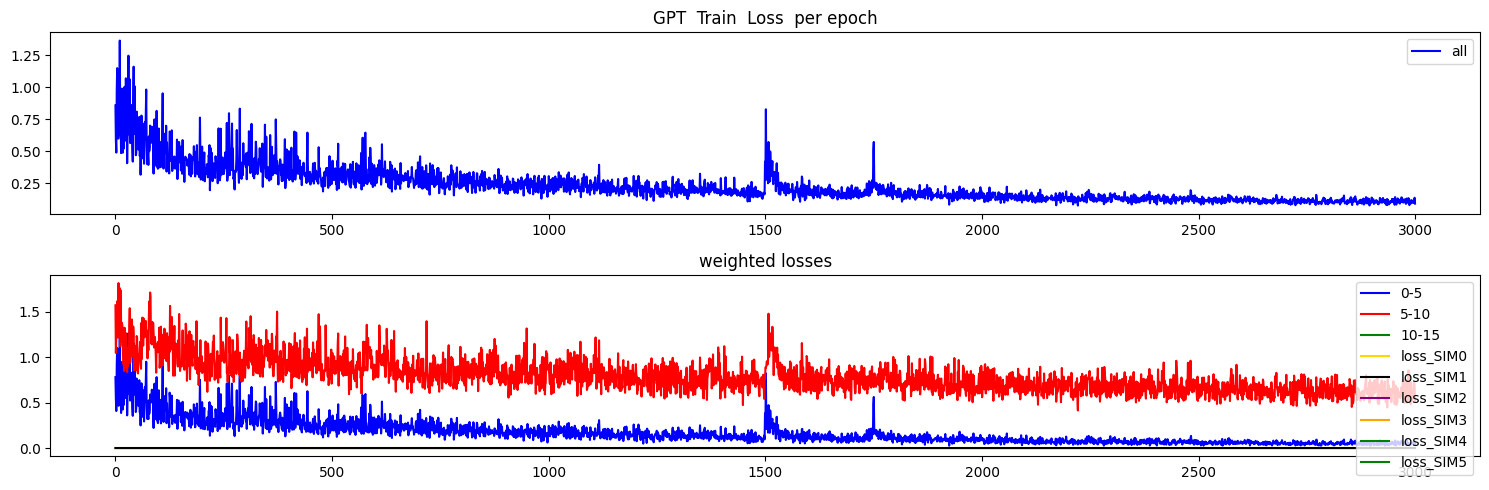

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


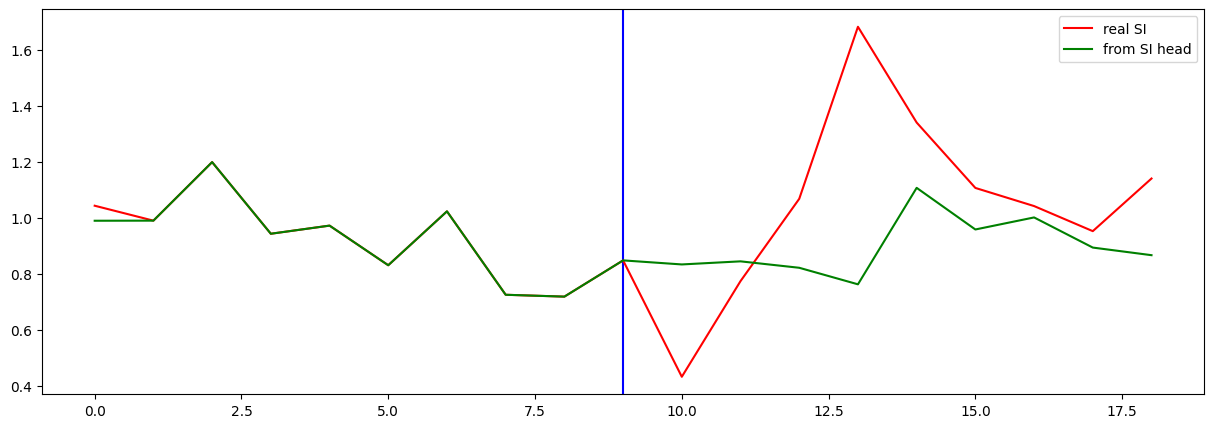

Testing R**2 - (all) - (no inputs):  0.9832128360836113
Testing R**2 - (f2) - SI full (no inputs):  -0.9374056029640789
Testing R**2 - SI head only (no inputs):  -1.3317923272297798
0 ...index R**2 (no inputs):  -0.09533988965201501
1 ...index R**2 (no inputs):  -0.37593418622125463
2 ...index R**2 (no inputs):  -0.9374056029640789
3 ...index R**2 (no inputs):  -5.893518790054021
4 ...index R**2 (no inputs):  -0.40114056623341243
5 ...index R**2 (no inputs):  0.16307581515056935
6 ...index R**2 (no inputs):  -0.8350786256000917
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7783510071702062
10 ...index R**2 (no inputs):  -0.2582855986106425
11 ...index R**2 (no inputs):  -1295.5147015433622
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.005266070530061118
16 ...index R**2 (no inputs):  0.17084042375899633
17 ...index R**2 (no inputs):  -836.68

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [44]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.510281
Loss_SI: 0.4164353609085083 Loss_all: 1.3548911809921265
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.067837
Loss_SI: 0.025228241458535194 Loss_all: 0.45131587982177734
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.048758
Loss_SI: 0.017987946048378944 Loss_all: 0.32569053769111633
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.029891
Loss_SI: 0.00753222918137908 Loss_all: 0.23111870884895325
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.031365
Loss_SI: 0.007176545448601246 Loss_all: 0.2490563541650772
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.034636
Loss_SI: 0.010115218348801136 Loss_all: 0.2553265690803528
Prediction shape: torch.Size([32, 35])
===


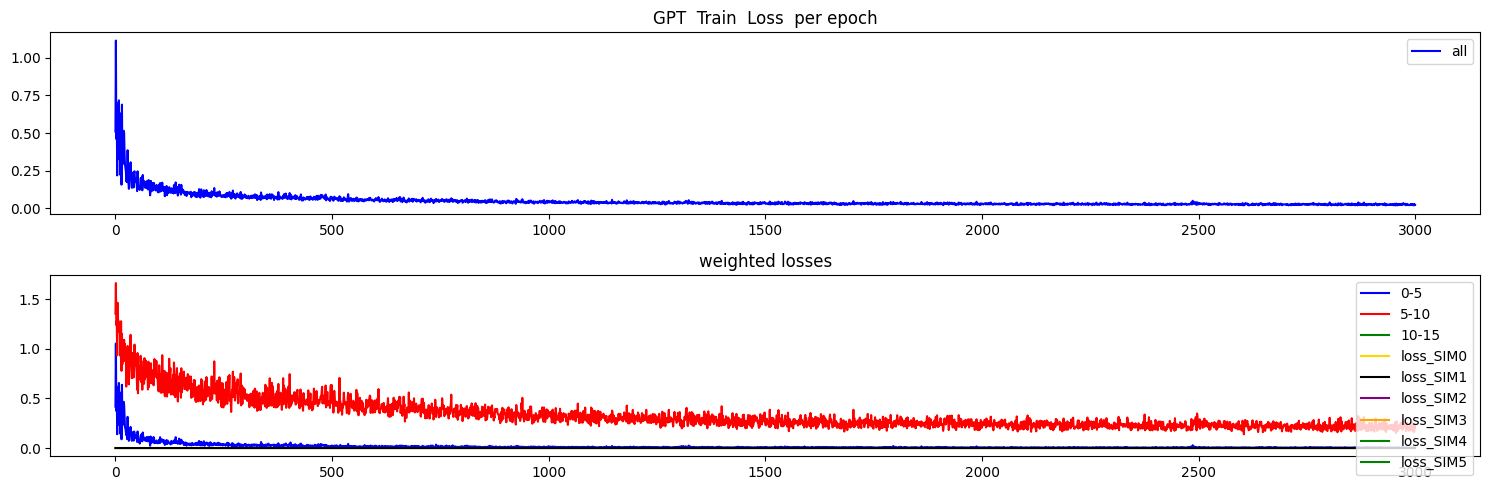

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


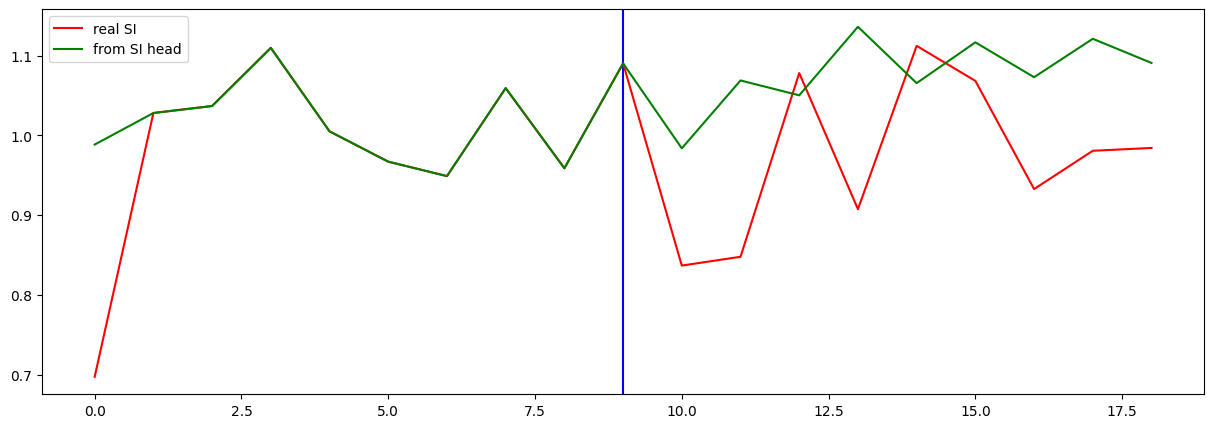

Testing R**2 - (all) - (no inputs):  0.876356224776751
Testing R**2 - (f2) - SI full (no inputs):  -2.9234014255128074
Testing R**2 - SI head only (no inputs):  -0.8939826029929256
0 ...index R**2 (no inputs):  -0.3132475424992631
1 ...index R**2 (no inputs):  -0.5796870212071916
2 ...index R**2 (no inputs):  -2.9234014255128074
3 ...index R**2 (no inputs):  -4018.1625583998625
4 ...index R**2 (no inputs):  -10443.058324409061
5 ...index R**2 (no inputs):  -36.70980760024348
6 ...index R**2 (no inputs):  -878.4347345821541
7 ...index R**2 (no inputs):  -661.706496882414
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.3498116030982763
10 ...index R**2 (no inputs):  -1.6131205709674692
11 ...index R**2 (no inputs):  -288.3204380050471
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.3330868195791727
16 ...index R**2 (no inputs):  -0.3993558460253408
17 ...index R**2 (no inputs):  

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.463614
Loss_SI: 0.3877287805080414 Loss_all: 1.146576166152954
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.146084
Loss_SI: 0.10305441170930862 Loss_all: 0.5333467125892639
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.143891
Loss_SI: 0.08304852247238159 Loss_all: 0.6914688944816589
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.095311
Loss_SI: 0.04468576982617378 Loss_all: 0.5509393215179443
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.055670
Loss_SI: 0.016427893191576004 Loss_all: 0.40885382890701294
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.045014
Loss_SI: 0.012105005793273449 Loss_all: 0.3411966860294342
Prediction shape: torch.Size([32, 35])
===


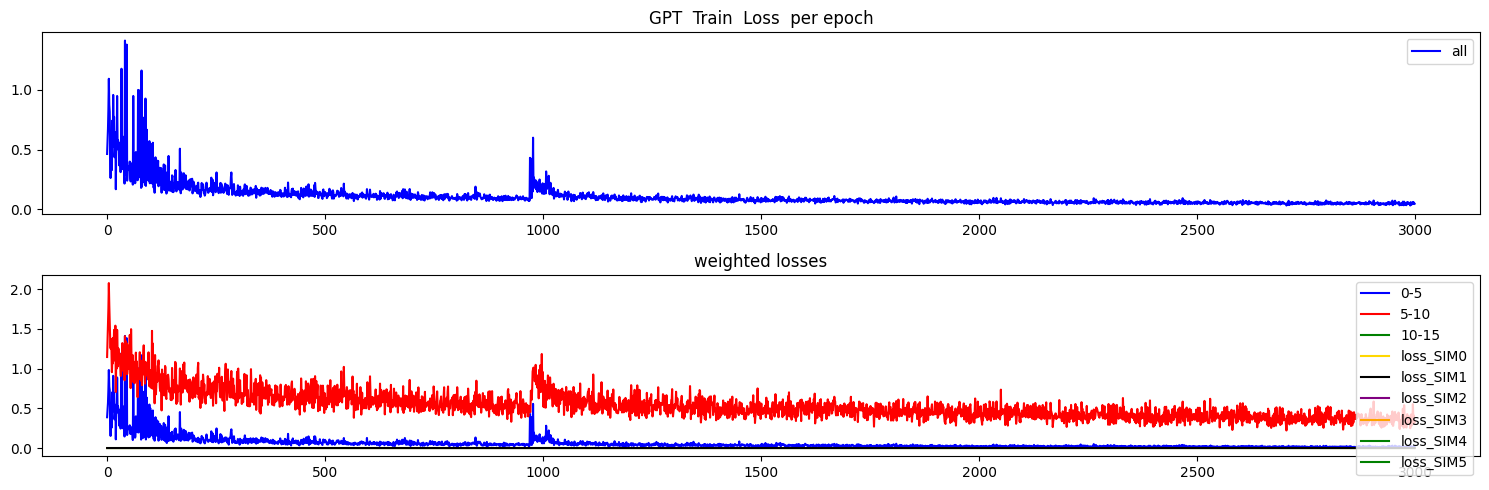

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


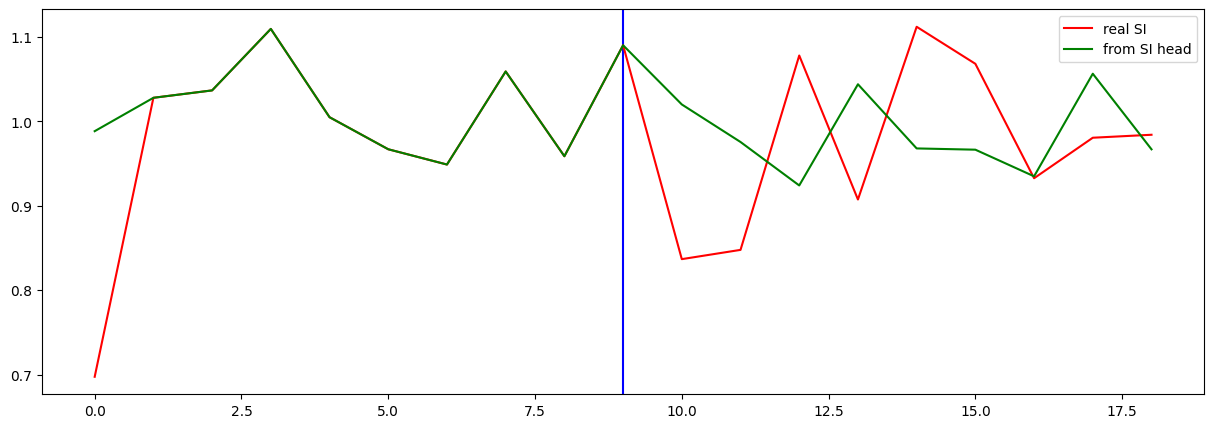

Testing R**2 - (all) - (no inputs):  0.9938816018154127
Testing R**2 - (f2) - SI full (no inputs):  -0.9271772746201967
Testing R**2 - SI head only (no inputs):  -0.011161453949794842
0 ...index R**2 (no inputs):  -0.15326153097213413
1 ...index R**2 (no inputs):  -1.7561799174956803
2 ...index R**2 (no inputs):  -0.9271772746201967
3 ...index R**2 (no inputs):  -43.33507653286479
4 ...index R**2 (no inputs):  -1268.2794693414917
5 ...index R**2 (no inputs):  -0.8313405885496716
6 ...index R**2 (no inputs):  -94.75583435731353
7 ...index R**2 (no inputs):  -1486.1831975109556
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.1270683044382216
10 ...index R**2 (no inputs):  -0.022611207222636764
11 ...index R**2 (no inputs):  -4413.726318824857
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.042311560328773
16 ...index R**2 (no inputs):  0.043849965100968946
17 ...index R**2 (no inp

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.722149
Loss_SI: 0.662355363368988 Loss_all: 1.260295033454895
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.131834
Loss_SI: 0.0797511637210846 Loss_all: 0.6005788445472717
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.185328
Loss_SI: 0.14311617612838745 Loss_all: 0.5652370452880859
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.144285
Loss_SI: 0.10040879249572754 Loss_all: 0.5391661524772644
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.099342
Loss_SI: 0.06095043569803238 Loss_all: 0.4448623061180115
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.065823
Loss_SI: 0.029292332008481026 Loss_all: 0.3945966362953186
Prediction shape: torch.Size([32, 35])
===


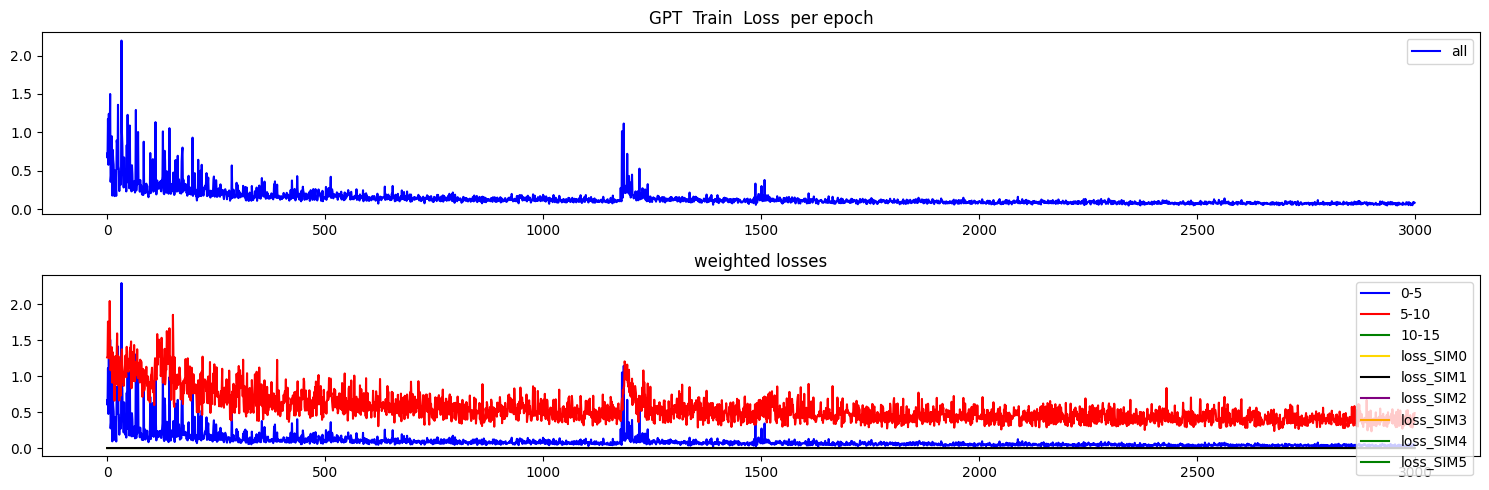

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


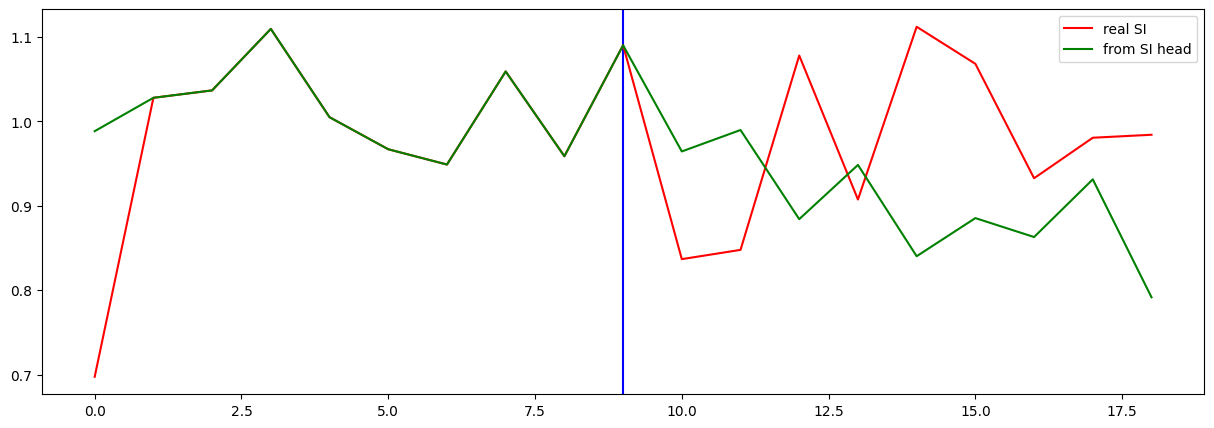

Testing R**2 - (all) - (no inputs):  0.9549893267578576
Testing R**2 - (f2) - SI full (no inputs):  -1.723079117469681
Testing R**2 - SI head only (no inputs):  0.046748360524403565
0 ...index R**2 (no inputs):  -0.23542915262217434
1 ...index R**2 (no inputs):  -0.1231302043548681
2 ...index R**2 (no inputs):  -1.723079117469681
3 ...index R**2 (no inputs):  -630.3348745715186
4 ...index R**2 (no inputs):  -3585.2010453556745
5 ...index R**2 (no inputs):  -12.020588541056732
6 ...index R**2 (no inputs):  -64.96193098753335
7 ...index R**2 (no inputs):  -103548.21638884961
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.21704546629228716
10 ...index R**2 (no inputs):  -0.004983078829849719
11 ...index R**2 (no inputs):  -1857.1054412706965
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7997585037463597
16 ...index R**2 (no inputs):  -0.7998805052594651
17 ...index R**2 (no inp

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.436950
Loss_SI: 0.3591417074203491 Loss_all: 1.1372263431549072
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.131774
Loss_SI: 0.08031103014945984 Loss_all: 0.5949362516403198
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.119233
Loss_SI: 0.08195221424102783 Loss_all: 0.454763263463974
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.137004
Loss_SI: 0.1063937097787857 Loss_all: 0.41250085830688477
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.083639
Loss_SI: 0.0385703518986702 Loss_all: 0.48925888538360596
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.111795
Loss_SI: 0.0717434212565422 Loss_all: 0.47226253151893616
Prediction shape: torch.Size([32, 35])
===


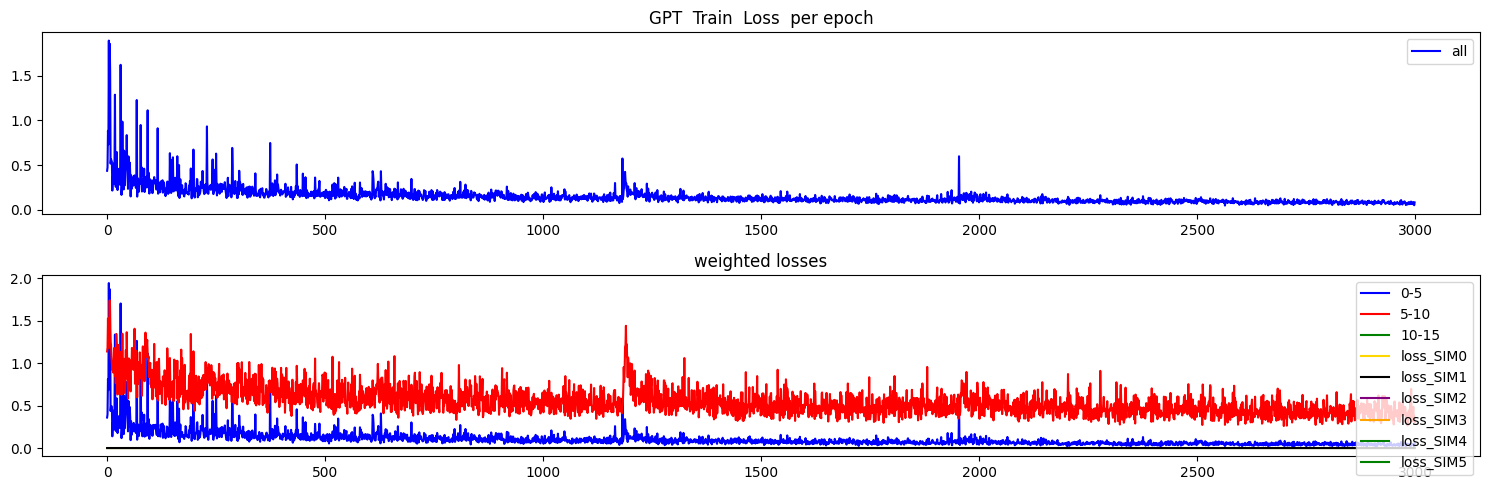

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


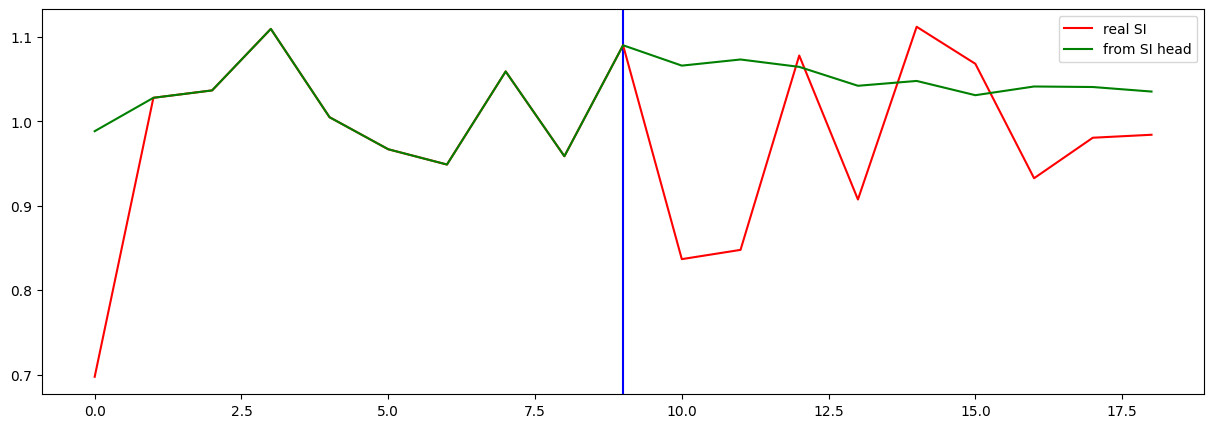

Testing R**2 - (all) - (no inputs):  0.98372968783869
Testing R**2 - (f2) - SI full (no inputs):  -0.20041713900370972
Testing R**2 - SI head only (no inputs):  -0.5469877512133083
0 ...index R**2 (no inputs):  -0.18249357548076417
1 ...index R**2 (no inputs):  -0.04784595658748714
2 ...index R**2 (no inputs):  -0.20041713900370972
3 ...index R**2 (no inputs):  -638.382453218366
4 ...index R**2 (no inputs):  -1117.12885490235
5 ...index R**2 (no inputs):  -1.4849619542479582
6 ...index R**2 (no inputs):  -292.8182367205709
7 ...index R**2 (no inputs):  -277143.20994220016
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.20628993897584147
10 ...index R**2 (no inputs):  -0.5085363737366433
11 ...index R**2 (no inputs):  -2315.3627425923432
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.997502890978772
16 ...index R**2 (no inputs):  -0.03792493388293239
17 ...index R**2 (no inputs

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [49]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [50]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: 0.018321080025713754


In [51]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: 0.04264421646083549


In [52]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: -0.045733798772980006


In [53]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.2701619950795455



## First Few R2


In [54]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [55]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....R² on first n steps: 0.6897758978799602
2 .....R² on first n steps: 0.42140187392264494
3 .....R² on first n steps: -0.012667072308351068
4 .....R² on first n steps: 0.038354383949792625
5 .....R² on first n steps: 0.018765352783956524
6 .....R² on first n steps: 0.008519871185350136
7 .....R² on first n steps: 0.04574187588193457
8 .....R² on first n steps: 0.03263430181694671
9 .....R² on first n steps: 0.018321080025713754


In [56]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....R² on first n steps: -0.13356276699405156
2 .....R² on first n steps: 0.0686833647947378
3 .....R² on first n steps: 0.015845184351101493
4 .....R² on first n steps: 0.020928431365363487
5 .....R² on first n steps: 0.033343366654292717
6 .....R² on first n steps: -0.05515934920487586
7 .....R² on first n steps: -0.005546201847205445
8 .....R² on first n steps: 0.022300994770916405
9 .....R² on first n steps: 0.04264421646083549


In [57]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....R² on first n steps: -0.27872163264423566
2 .....R² on first n steps: -0.25706787859496716
3 .....R² on first n steps: -0.11735659087240591
4 .....R² on first n steps: -0.1626499602610787
5 .....R² on first n steps: -0.15512348166109846
6 .....R² on first n steps: -0.10056511200584284
7 .....R² on first n steps: -0.07495479755586221
8 .....R² on first n steps: -0.0698881840494916
9 .....R² on first n steps: -0.045733798772980006


In [58]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....R² on first n steps: -0.07946394279089186
2 .....R² on first n steps: -0.4446186180621119
3 .....R² on first n steps: -0.43339547743630713
4 .....R² on first n steps: -0.47656870441578625
5 .....R² on first n steps: -0.37791087315940164
6 .....R² on first n steps: -0.3102051838489508
7 .....R² on first n steps: -0.2823704231472155
8 .....R² on first n steps: -0.2797743649812918
9 .....R² on first n steps: -0.2701619950795455



## Plot


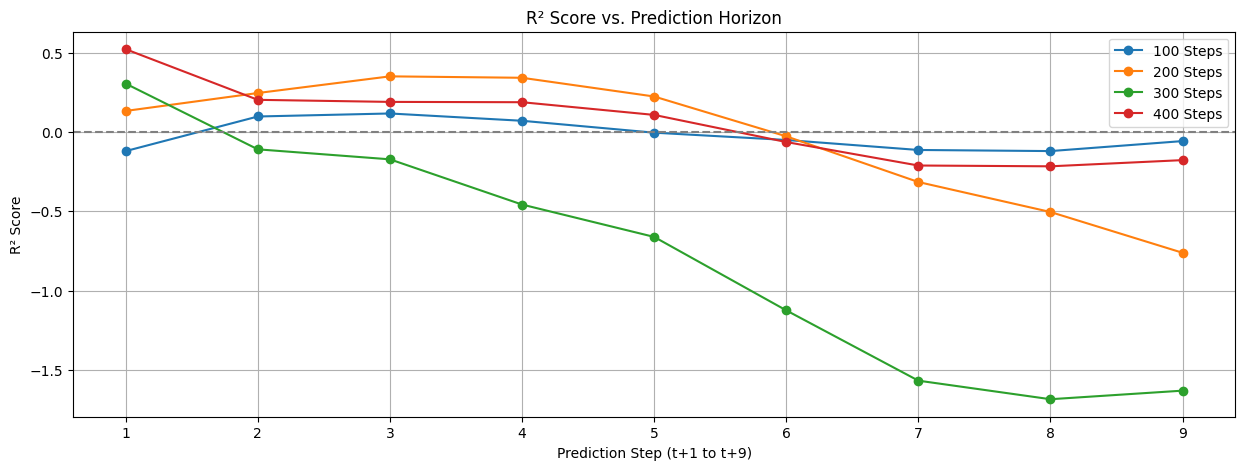

In [59]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
